# Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import datetime

import tensorflow as tf
import pickle
import joblib
tf.random.set_seed(4)


In [2]:
reviews = pd.read_csv('encoded_reviews_file.csv')
reviews

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0
...,...,...
5597,camera bad,0
5598,camera stop work month fast charging isn t wor...,0
5599,set clone app whatsapp doneclone whatsapp pr k...,0
5600,phone lag 22 storage,0


# User Defined Functions

In [3]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']

In [4]:
def confusion_metrix_plot(x,y, model):
    ticks = ['Negative', 'Neutral', 'Positive']
    y_predict = np.argmax(model.predict(x), axis = 1)
    conf_table = confusion_matrix(y, y_predict)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_table, annot= True, fmt= 'd',cmap= sns.dark_palette('purple'),
        xticklabels= ticks, yticklabels= ticks, )
    plt.xlabel('Prediction', fontsize= 16)
    plt.ylabel('Correct Values', fontsize= 16)
    print('\n', classification_report(y, y_predict))

In [203]:
def get_prediction(comment, model):
    if str(type(encoded_reviews_list_pad)) == "<class 'numpy.ndarray'>":
        prediction = np.argmax(model.predict(comment), axis = 1)
    elif type(comment) == list:
        prediction = np.argmax(model.predict(comment), axis = 1)
    else:
        prediction = np.argmax(model.predict([comment]))
    # print(prediction)
    return prediction

In [6]:
log_dir_fun = 'neural_2_logs/'
def log_dir_(model_name):
    LOG_DIR = log_dir_fun + model_name+ '_' +datetime.datetime.now().strftime('%d_%m_%Y-%H%M%S')
    return LOG_DIR

log_dir_('model') 

'neural_2_logs/model_29_01_2022-092454'

In [26]:
PATH = 'Model_files/'

In [27]:

def save_model_dir(model, name, PATH=PATH, format_save = '.tf'):
    model_dir = PATH
    NAME = PATH + name+ '_'+datetime.datetime.now().strftime('%d_%m_%y-%H_%M_%S')+format_save
    model.save(NAME)
    print(f'Model is saved with name {NAME}')

In [11]:
def rnn_model_func(VOCAB_SIZE, SENTENCE_LENGTH, EMBEDDING, model_name, log_path, lr_rate = 0.001 ,X_train = x_train,
    DROPOUT = 0, RE_DROPOUT = 0, RE_REGULARIZER = None,
    X_val = x_val, Y_train = y_train, Y_val = y_val, EPOCHS = 10):
    """
    

    """
    log_dir_fun = log_path
    encoder = TextVectorization(max_tokens= VOCAB_SIZE, output_sequence_length=SENTENCE_LENGTH)
    encoder.adapt(X_train)
    model = Sequential()
    model.add(encoder)
    model.add(Embedding(input_dim=VOCAB_SIZE-2, output_dim= EMBEDDING))
    model.add(SimpleRNN(SENTENCE_LENGTH, dropout= DROPOUT, recurrent_dropout= RE_DROPOUT, recurrent_regularizer= RE_REGULARIZER))
    model.add(Dense(3, activation='softmax'))

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir_(model_name))

    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lr_rate), 
        loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train, epochs = EPOCHS, validation_data = [X_val, Y_val], 
        callbacks = [tensorboard_callback])

    return model, history




# Train-test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(reviews['lemmatized'], reviews['Sentiment'], test_size= 0.2, random_state = 4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.25, random_state= 4)

In [12]:
x_train.shape, x_val.shape, x_test.shape

((3360,), (1121,), (1121,))

# Tensorflow Models

In [167]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Normalization
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, GRU, Bidirectional
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.preprocessing.text import Tokenizer, one_hot

import os
# import datetime
from tensorflow.keras.models import load_model, save_model

In [14]:
# log_dir = 'neural_2_logs/'
PATH = 'Model_files/'

## Exploring NLP related terms

### Word Vectorize methods

#### One Hot vectorizer

In [11]:
one_hot_vectorizer = [one_hot(sentence, n = 500) for sentence in x_train]

In [12]:
[print(encode, '\n') for  encode in one_hot_vectorizer[:5]]
print(x_train[:5])

[93, 320, 28, 139, 125, 296, 465, 475, 47, 296, 150, 320, 388] 

[146, 262, 497, 262, 354, 388, 428, 28] 

[368, 266, 146, 266, 376, 266, 305, 28, 139, 34] 

[139, 28, 55, 192, 497, 495, 321, 54, 97] 

[174, 304, 305, 54, 169, 55, 387] 

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
3320                 battery drain time hardly 5 hour use
Name: lemmatized, dtype: object


In [13]:
len(one_hot_vectorizer)

3360

In [14]:
max(one_hot_vectorizer), min(one_hot_vectorizer)

([499, 360, 451, 197, 169, 407, 376, 351, 387],
 [1,
  124,
  405,
  206,
  256,
  446,
  454,
  297,
  166,
  62,
  215,
  381,
  293,
  12,
  342,
  423,
  336,
  18,
  458,
  276,
  418])

In [15]:
min([min(x) for x in one_hot_vectorizer])

1

In [16]:
max([max(x) for x in one_hot_vectorizer])

499

In [17]:
lst_tokens = list(map(str.split, x_train))

In [18]:
def distinct_word(corpus):
    """
    Determine a list of distinct words for corpus
    params: 
        Corpus (list of list of strings)
    Return:
        Corpus_word (list of unique strings)
        Num_corpus_words
    """
    
    corpus_word = []
    for list_ in lst_tokens:
        for word in list_:
            if word == None:
                pass
            else:
                corpus_word.append(word)

    corpus_word = set(corpus_word)
    corpus_word_list =[]
    for word in corpus_word:
        corpus_word_list.append(word)


    corpus_word_list.sort()
    num_corpus_words = len(corpus_word_list)
    return corpus_word_list, num_corpus_words

In [19]:
unique_words, no_of_words = distinct_word(lst_tokens)

In [20]:
no_of_words

5648

In [21]:
a = 'hello, my name is piyush. This is string created to test one_hot vector method given in tensorflow'
len(a.split())

17

In [22]:
one_hot(a, n = 20)

[4, 19, 5, 13, 8, 17, 13, 10, 1, 16, 6, 15, 11, 17, 10, 16, 8, 10]

### Tokenizer

In [23]:
tokenizer = Tokenizer(num_words= 5600)
tokenizer.fit_on_texts(x_train)

In [24]:
encoded_reviews = tokenizer.texts_to_sequences(x_train)

In [25]:
encoded_reviews[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

In [26]:
tokenizer.word_index['good']

2

In [27]:
tokenizer.word_index['phone']

1

In [28]:
B = tokenizer.get_config()['word_counts']
import json
dict_count = json.loads(B)

In [29]:
dict_count

{'awesome': 249,
 'product': 404,
 'good': 2095,
 'phone': 2920,
 'budget': 81,
 'thank': 64,
 'amazon': 242,
 'exta': 1,
 'discount': 10,
 'deliver': 32,
 'day': 600,
 'camera': 1892,
 'upto': 68,
 'mark': 77,
 'finger': 106,
 'print': 97,
 'reader': 81,
 'work': 464,
 'game': 132,
 'beast': 25,
 'charge': 781,
 'beastsimply': 1,
 '30000': 31,
 'explode': 25,
 'm': 210,
 'afraid': 9,
 'close': 76,
 'plan': 22,
 'buy': 586,
 'pls': 18,
 'choose': 23,
 'battery': 1387,
 'drain': 328,
 'time': 435,
 'hardly': 20,
 '5': 652,
 'hour': 168,
 'use': 414,
 'amazing': 154,
 'multi': 2,
 'task': 17,
 'ke': 24,
 'slow': 96,
 'ho': 34,
 'raha': 4,
 'hai': 94,
 'seller': 14,
 'ko': 8,
 'iske': 1,
 'bare': 2,
 'sochna': 1,
 'chahiye': 2,
 'system': 33,
 'stability': 11,
 'ka': 12,
 'hota': 17,
 'update': 298,
 'milega': 1,
 'ye': 15,
 'problem': 357,
 'solve': 52,
 'sakta': 2,
 'baki': 2,
 'look': 324,
 'fingerprint': 165,
 'little': 118,
 'bit': 119,
 'bettery': 11,
 'life': 403,
 'well': 366,
 'q

In [30]:
tokenizer_df = pd.DataFrame(dict_count.values(), index= dict_count.keys(), columns=['counts'])
tokenizer_df.head()

,counts
awesome,249
product,404
good,2095
phone,2920
budget,81


In [31]:
tokenizer_df.sort_values(by = 'counts', ascending= False)

,counts
phone,2920
good,2095
camera,1892
battery,1387
2,954
...,...
fi,1
expectedalso,1
jackmemory,1
availablebattery,1


Let's try to find length of sentences and plot their histogram

In [32]:
len_sentences = [len(x) for x in encoded_reviews]

<AxesSubplot:ylabel='Count'>

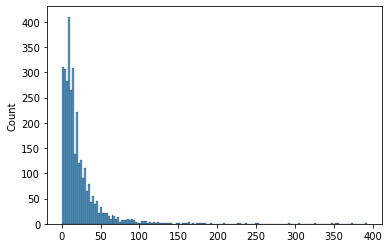

In [33]:
sns.histplot(len_sentences)

In [34]:
len_sentences = np.array(len_sentences)

In [35]:
len_sentences.mean()

22.935714285714287

As we can see that the WortTokenizer assigns the number according to the count of that word, higher the count lower the labels

> As we can see the count of word 'phone' is highest, hence its label will be lowest = 1.

#### Saving Tokenizer method into pickle so we can use it in prediction

In [36]:
# Make director to save this files
PATH_TO_SAVE_VECTORIZER = 'Vectorizer_pickle'
# os.mkdir('Vectorizer_pickle')

In [37]:
file = open('Vectorizer_pickle/Tokenizer.pkl', 'wb')
pickle.dump(tokenizer, file)

So we can export this Tokenizer so now let's re-import it into different variable 

In [38]:
file_ = open(PATH_TO_SAVE_VECTORIZER+'/Tokenizer.pkl', 'rb')
loaded_tokenizer = pickle.load(file_)

In [39]:
loaded_tokenizer.texts_to_sequences(x_train)[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

In [40]:
x_test

4242                                         nice product
3668    change issue wrap charge doesn t work take app...
1079    feel quality performance unbeatable s iphone s...
1350    phone good fast 90 hz display smooth camera aw...
4161    mobile good camara battery low weight manageme...
                              ...                        
5410    good video stop unfortunately multimedia exper...
3186    1 st oneplus phone battery backup need improve...
2433    m regular user samsung time switch brand like ...
2524      superb camera nice picture quality nice feature
3800    find nord 2 extremely capable device s run hea...
Name: lemmatized, Length: 1121, dtype: object

In [41]:
loaded_tokenizer.texts_to_sequences(x_test)

[[66, 28],
 [215, 11, 783, 10, 116, 6, 23, 93, 1939, 5, 199, 411, 100],
 [37, 7, 24, 9, 313, 2955, 520, 24, 80, 354, 1740, 663, 9, 9, 152, 309, 313],
 [1, 2, 12, 110, 94, 38, 64, 3, 52, 4, 29, 19, 165, 46, 284, 36, 16],
 [15, 2, 585, 4, 106, 453, 672, 232, 198, 585, 2386, 251],
 [19,
  1,
  7,
  752,
  59,
  6,
  20,
  2030,
  606,
  7,
  130,
  308,
  174,
  1021,
  313,
  403,
  18,
  5,
  9,
  4,
  19,
  50,
  19,
  54,
  320,
  1196,
  505,
  1,
  322,
  522,
  16,
  313],
 [4, 40, 12, 26, 48, 37, 17, 500, 26, 2206, 2040, 1455],
 [172, 3, 457, 4208, 164, 64, 1396, 1854, 1374, 531, 2990, 208, 3, 2],
 [2,
  8,
  18,
  5,
  2839,
  850,
  41,
  1,
  3401,
  9,
  109,
  1,
  42,
  98,
  131,
  346,
  18,
  2839,
  2,
  4,
  730,
  813,
  2031,
  4,
  25,
  672,
  59,
  82,
  76,
  45,
  26,
  3,
  14,
  26,
  525,
  26,
  129,
  9,
  2,
  353,
  1,
  177,
  26,
  93,
  358,
  129,
  96],
 [145, 2, 20, 1, 462, 126, 122, 121, 130, 102, 50, 3, 52, 184, 129, 1845, 358],
 [759, 319, 18, 5, 

Hence it is working file and absolute, so we can used this method also for creating united RNN models. we can see it from **words like "phone" and "good"**

### TextVectorizer layer

#### Default settings

In [42]:
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 150

In [43]:
text_vectorizer_encoder = TextVectorization(max_tokens= VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_vectorizer_encoder.adapt(x_train)

In [44]:
vocab_text_vectorizer = text_vectorizer_encoder.get_vocabulary()

In [45]:
len(vocab_text_vectorizer)

5600

In [46]:
text_vectorizer_encoder.get_weights()

[array([b'phone', b'good', b'camera', ..., b'84', b'83', b'82'],
       dtype=object)]

In [47]:
text_vectorizer_encoder.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'string',
 'max_tokens': 5600,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 150,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [48]:
vectorized_text = text_vectorizer_encoder(x_train)
vectorized_text

<tf.Tensor: shape=(3360, 150), dtype=int64, numpy=
array([[ 53,  29,   3, ...,   0,   0,   0],
       [  4, 213, 193, ...,   0,   0,   0],
       [106, 486,   4, ...,   0,   0,   0],
       ...,
       [ 20,   2, 236, ...,   0,   0,   0],
       [ 17,   2,   6, ...,   0,   0,   0],
       [ 66,   9,  17, ...,   0,   0,   0]], dtype=int64)>

In [49]:
x_train

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
3320                 battery drain time hardly 5 hour use
                              ...                        
1528    wrong seller responsible packaging charger doe...
2120    bad quality connectivity buy replace issue get...
1295    bad phone see don t buy phone phone restart au...
1708    buy phone 2 month hang issue 2 month not use h...
1706    purchase oneplus buy high expectation phone me...
Name: lemmatized, Length: 3360, dtype: object

As you can see the layers is first initialized with x_train and then if we feed other dataset or string, those will be handled according to **adapted dataset**.

Let's try by taking some strings from x_train and also with x_test

> **💀NOTE💀** In following example i am using ***x_train[1]***, it means that i am taking review having label as ***1***. you can cross check it from DataFrame. (i am so lucky that review having label 1 fall in training set 😅😅)

In [50]:
print(f'First string {x_train[1]}')  # We are taking because it contains word "phone"
first_review = x_train[1]

First string like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra buck pocket u wanna spend tell u pro con phone honestly 3 4 day vigorous usage pro 1 ultra premium feature price range 30 k pretty match feature higer range plus model 2 display great 3 screen refresh rate actually feel fast 0 hz 4 heating issue phone charger till 5 give cover phone pretty good actually bump camera portion actually save phone direct fall rough floor screen scratch cover s test guysand actually feel elegant need hectic work search cover buy phone infact scratch guard screen handy don t think u need temper guard u handle ur phone anyways s choice m going to scratch guard week month n let go week feel perform outstanding will not tell u feature phone u 

In [51]:
text_vectorizer_encoder(first_review)

<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([  18,  392,  243,    7,   78,  653,   61,   18, 2810,   57,  741,
        600,  612,   61,  778,    2,   70,   18,    2,   36,  107,   35,
         84,  811,   81,   17,  718,   17,  313,  149,   19,    6,  154,
         36,  422,  243,    7,  233,   35,   17,    2,  313,  938,  928,
         84,   40,   35,   23,   19,    6, 1422,   32,    7,   56,   21,
        132,  139,   71,    2,   21,  517, 1647,  585,  128, 1158,  468,
        392,  128,   85,  159,    2,  938,   22,   31,   15, 2936,   62,
         85,   23,  466,   99,   58,   36,   71,   40,   35,  173,  825,
         58, 4384,   71,   21,  308,    6,   39,   37,   22,   46,  210,
        153,  280,   38,   13,  188,   96,   31,   45,   12,    2,   75,
        208,   14,   78,  315,    2,  173,    3,  280, 2681,    4, 2256,
        280,  525,    2, 1034,  665, 1486, 4604,   46,  402,  315,   10,
        488, 4465,  280,   38, 1385,   56, 1573,   24,  808,  315,   17,
     

In [52]:
text_vectorizer_encoder('phone')

<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)>

As expected the **phone got the number 2 as encoding**, hence this method is based on the same method as Tokenizer. so **1 int may be assigned to ''** 

In [53]:
vectorized_text_array = np.array(vectorized_text)

In [54]:
vectorized_text_array[vectorized_text_array == 0] = 100000

In [55]:
print(x_train[3093])
print(text_vectorizer_encoder(x_train[3093]))

work perfect app porfermance smooth like butter camera good good battery charging fast
tf.Tensor(
[  24  202   26 3670   65   18  647    4    3    3    5  101   13    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0], shape=(150,), dtype=int64)


In [56]:
np.where(vectorized_text_array.min(axis = 1) == 1)

(array([  35,  199,  374,  382,  592,  622,  645,  776,  831,  867, 1016,
        1067, 1142, 1188, 1197, 1266, 1379, 1460, 1506, 1529, 1536, 1683,
        1823, 2153, 2169, 2362, 2399, 2421, 2451, 2507, 2558, 2750, 2824,
        2932, 3036, 3228, 3261, 3337, 3354], dtype=int64),)

In [57]:
vectorized_text_array[1807]

array([     3,     29,    123,     54,     37,     58, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
       100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000,
      

In [58]:
vectorized_text_array.min(axis = 1)

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

In [59]:
print(list(x_train)[1807])
text_vectorizer_encoder(list(x_train)[1807])

good product value money great feature


<tf.Tensor: shape=(150,), dtype=int64, numpy=
array([  3,  29, 123,  54,  37,  58,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int64)>

As we can see, ***1 label is attached to string "03"***

#### Custom Vectorization methods

We can change Vectorization methods here to CountVectorizer, TF-IDF, One-Hot, **Which is refered as *output_mode* in TextVectorization settings**
There are Following methods, we can also pass n-grams to this methods:

- **int**:  Outputs integer indices, one integer index per split string token. When output_mode == "int", 0 is reserved for masked locations; this reduces the vocab size to **max_tokens - 2 instead of max_tokens - 1**.

 
- **multi_hot**:  Outputs a single int array per batch, of either vocab_size or max_tokens size, containing 1s in all elements where the token mapped to that index exists at least once in the batch item.
 

- **count**:  Like "multi_hot", but the int array contains a count of the number of times the token at that index appeared in the batch item.

 
- **tf_idf**:  Like "multi_hot", but the TF-IDF algorithm is applied to find the value in each token slot. 
For "int" output, any shape of input and output is supported. For all other output modes, currently only rank 1 inputs (and rank 2 outputs after splitting) are supported. 

#### Multi-hot Method

In [60]:
text_vectorizer_encoder_onehot = TextVectorization(max_tokens= VOCAB_SIZE, output_mode= 'multi_hot')
text_vectorizer_encoder_onehot.adapt(x_train)

In [61]:
text_vectorizer_encoder_onehot.get_config()

{'name': 'text_vectorization_1',
 'trainable': True,
 'batch_input_shape': (None, None),
 'dtype': 'string',
 'max_tokens': 5600,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'multi_hot',
 'output_sequence_length': None,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

In [62]:
text_vectorizer_encoder_onehot.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

In [63]:
print(x_train[1])
print(text_vectorizer_encoder_onehot(x_train[1]))

like tell win t give technical review like ytube video going to honest review general phone user like phone price 20 k think research lot buy confuse buy iphone 12 nord 2 know price difference win t 50 k buy phone iphone honestly man think 30 k 1 nord 2 astonishing don t need plus 9 high range phone plus extra buck pocket u wanna spend tell u pro con phone honestly 3 4 day vigorous usage pro 1 ultra premium feature price range 30 k pretty match feature higer range plus model 2 display great 3 screen refresh rate actually feel fast 0 hz 4 heating issue phone charger till 5 give cover phone pretty good actually bump camera portion actually save phone direct fall rough floor screen scratch cover s test guysand actually feel elegant need hectic work search cover buy phone infact scratch guard screen handy don t think u need temper guard u handle ur phone anyways s choice m going to scratch guard week month n let go week feel perform outstanding will not tell u feature phone u read em speci

In [64]:
text_vectorizer_encoder_onehot.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

The one_hot encoding is in same order as vocabolary

#### CountVectorizer

In [65]:
text_vectorizer_encoder_count = TextVectorization(max_tokens=VOCAB_SIZE, output_mode='count')
text_vectorizer_encoder_count.adapt(x_train)

In [66]:
text_vectorizer_encoder_count.get_vocabulary()

['[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 'low',

In [67]:
x_train[3093], x_train[1775], x_train[1273]

('work perfect app porfermance smooth like butter camera good good battery charging fast',
 'bad camera sony cam unbelievable bad fingerprint sensor slow good thing fast charge charge fastly',
 'watch youtube video enhance depth gadget specific knowledge require daily usage phone case minute detail visible human eye phone clearly meet expectation start camera battery screen performance s champ')

In [68]:
text_vectorizer_encoder_count(x_train)

<tf.Tensor: shape=(3360, 5600), dtype=float32, numpy=
array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

It is similar to countvectorizer in scikit-learn

## Tensorflow models

## RNN models

### RNN 1

In [158]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [159]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model = Sequential()
rnn_model.add(text_encoder)
rnn_model.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model.add(SimpleRNN(30))
rnn_model.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model'))

rnn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])


In [160]:
rnn_model.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 42s 253ms/step - loss: 0.9468 - accuracy: 0.5405 - val_loss: 0.7898 - val_accuracy: 0.6824
Epoch 2/10
105/105 [==============================] - 29s 277ms/step - loss: 0.5588 - accuracy: 0.7756 - val_loss: 0.8157 - val_accuracy: 0.6708
Epoch 3/10
105/105 [==============================] - 25s 238ms/step - loss: 0.3563 - accuracy: 0.8607 - val_loss: 0.7489 - val_accuracy: 0.7012
Epoch 4/10
105/105 [==============================] - 21s 198ms/step - loss: 0.1927 - accuracy: 0.9324 - val_loss: 1.0714 - val_accuracy: 0.6405
Epoch 5/10
105/105 [==============================] - 20s 188ms/step - loss: 0.1410 - accuracy: 0.9491 - val_loss: 1.1134 - val_accuracy: 0.6949
Epoch 6/10
105/105 [==============================] - 20s 194ms/step - loss: 0.1678 - accuracy: 0.9426 - val_loss: 1.4401 - val_accuracy: 0.6182
Epoch 7/10
105/105 [==============================] - 20s 193ms/step - loss: 0.1985 - accuracy: 0.9265 - val_loss: 1.2312 - val_ac

In [161]:
get_prediction('Good phone', rnn_model)

1

In [162]:
get_prediction('Best phone', rnn_model)

1

In [163]:
get_prediction('bad phone', rnn_model)

0

In [164]:
D = 'i love this mobile phone. its camera is good, battery backup is good but i found some problem in handling'
get_prediction(D, rnn_model)

0

In [165]:
D = 'i hate this mobile, screen is not working, camera is worst'
get_prediction(D, rnn_model)

0

In [166]:
D = 'worst phone in history'
get_prediction(D, rnn_model)

0

In [167]:
D = 'good phone with good camera'
get_prediction(D, rnn_model)

2

But because of randomness in our model, the results getting changer each time we run the model. To fix that we have to set random seet no.


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99      1210
           2       1.00      0.99      0.99      1213

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



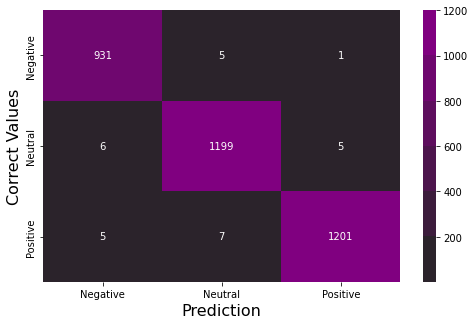

In [168]:
confusion_metrix_plot(x_train, y_train, rnn_model)


               precision    recall  f1-score   support

           0       0.74      0.77      0.75       336
           1       0.55      0.56      0.56       374
           2       0.70      0.66      0.68       411

    accuracy                           0.66      1121
   macro avg       0.66      0.66      0.66      1121
weighted avg       0.66      0.66      0.66      1121



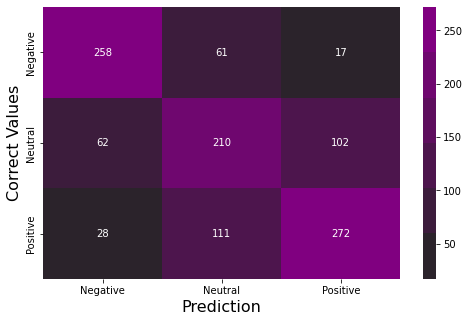

In [169]:
confusion_metrix_plot(x_val, y_val, rnn_model)

Here the mistakes i made in previous models:
- RNN nodes and Sentence Length was not same, because RNN node correspondes to word each word in sentences, so **no. of words in sentence equals to Nodes in RNN**
- Here i have used **vocabolary = VOCAB_SIZE-2**, i don't know its effect so lets try same model with **vocabolary = VOCAB_SIZE-1 and VOCAB_SIZE** 

> **💀NOTE:💀** The Vocabolary size is given as number that is suppose that vacab size is 500 then the numbering will start from 0 to 499 but in this 0 is reserved to actual numbering will be 1-498 so vocab size is reduced by 2. 

### RNN 1 With change in vocab size

In [170]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [171]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_vocab_1 = Sequential()
rnn_model_vocab_1.add(text_encoder)
rnn_model_vocab_1.add(Embedding(input_dim= VOCAB_SIZE-1, output_dim= EMBEDDING, mask_zero= True))
rnn_model_vocab_1.add(SimpleRNN(30))
rnn_model_vocab_1.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_vocal_1'))

rnn_model_vocab_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [172]:
rnn_model_vocab_1.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 43s 351ms/step - loss: 0.9478 - accuracy: 0.5420 - val_loss: 0.7907 - val_accuracy: 0.6833
Epoch 2/10
105/105 [==============================] - 25s 238ms/step - loss: 0.6396 - accuracy: 0.7286 - val_loss: 0.7684 - val_accuracy: 0.6824
Epoch 3/10
105/105 [==============================] - 20s 187ms/step - loss: 0.3418 - accuracy: 0.8664 - val_loss: 0.8399 - val_accuracy: 0.6815
Epoch 4/10
105/105 [==============================] - 20s 189ms/step - loss: 0.1937 - accuracy: 0.9339 - val_loss: 0.9963 - val_accuracy: 0.6922
Epoch 5/10
105/105 [==============================] - 25s 235ms/step - loss: 0.1360 - accuracy: 0.9551 - val_loss: 1.0772 - val_accuracy: 0.7065
Epoch 6/10
105/105 [==============================] - 22s 213ms/step - loss: 0.1314 - accuracy: 0.9551 - val_loss: 1.1518 - val_accuracy: 0.6851
Epoch 7/10
105/105 [==============================] - 19s 179ms/step - loss: 0.0830 - accuracy: 0.9708 - val_loss: 1.3729 - val_ac

In [181]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_vocab_1)
# np.argmax(rnn_model_vocab_1.predict(review_list), axis = 1)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [182]:
get_prediction('good phone', rnn_model_vocab_1)

1

In [183]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       937
           1       0.99      0.99      0.99      1210
           2       1.00      0.99      0.99      1213

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



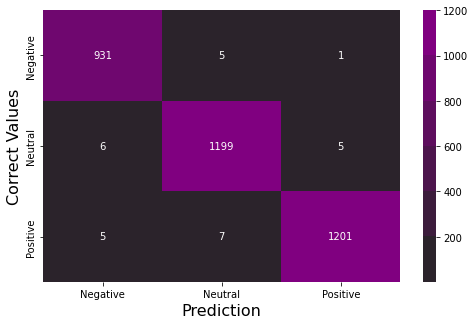

In [184]:
confusion_metrix_plot(x_train, y_train, rnn_model)


               precision    recall  f1-score   support

           0       0.84      0.78      0.81       336
           1       0.60      0.51      0.55       374
           2       0.66      0.80      0.72       411

    accuracy                           0.70      1121
   macro avg       0.70      0.70      0.70      1121
weighted avg       0.70      0.70      0.69      1121



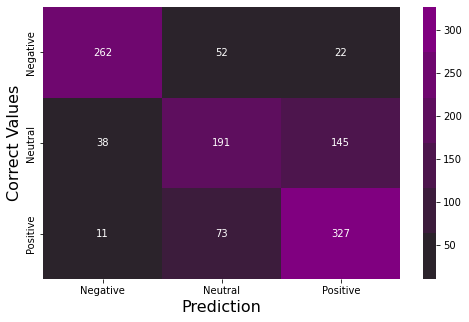

In [185]:
confusion_metrix_plot(x_val, y_val, rnn_model_vocab_1)

### RNN model with large dropout = 0.8

#### RNN model with dropout

In [187]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [188]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout = Sequential()
rnn_model_dropout.add(text_encoder)
rnn_model_dropout.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout.add(SimpleRNN(30, dropout= 0.8))
rnn_model_dropout.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout'))

rnn_model_dropout.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [189]:
rnn_model_dropout.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 39s 327ms/step - loss: 1.0879 - accuracy: 0.4208 - val_loss: 1.0297 - val_accuracy: 0.4344
Epoch 2/10
105/105 [==============================] - 31s 292ms/step - loss: 1.0258 - accuracy: 0.4833 - val_loss: 0.8960 - val_accuracy: 0.6004
Epoch 3/10
105/105 [==============================] - 28s 263ms/step - loss: 0.8907 - accuracy: 0.5759 - val_loss: 0.8692 - val_accuracy: 0.6075
Epoch 4/10
105/105 [==============================] - 28s 263ms/step - loss: 0.8253 - accuracy: 0.6083 - val_loss: 0.9936 - val_accuracy: 0.5112
Epoch 5/10
105/105 [==============================] - 31s 291ms/step - loss: 0.8001 - accuracy: 0.6262 - val_loss: 0.8400 - val_accuracy: 0.6351
Epoch 6/10
105/105 [==============================] - 35s 337ms/step - loss: 0.7781 - accuracy: 0.6482 - val_loss: 0.8145 - val_accuracy: 0.6459
Epoch 7/10
105/105 [==============================] - 28s 268ms/step - loss: 0.7351 - accuracy: 0.6768 - val_loss: 0.8072 - val_ac

In [190]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([2, 1, 0, 2, 0, 2], dtype=int64)

In [191]:
get_prediction('good phone', rnn_model_dropout)

2

In [192]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.71      0.91      0.80       937
           1       0.69      0.36      0.47      1210
           2       0.66      0.84      0.74      1213

    accuracy                           0.68      3360
   macro avg       0.69      0.70      0.67      3360
weighted avg       0.69      0.68      0.66      3360



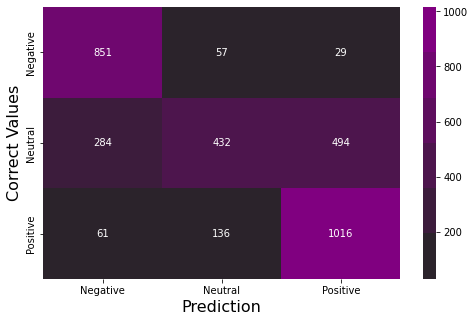

In [193]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout)


               precision    recall  f1-score   support

           0       0.68      0.84      0.75       336
           1       0.54      0.30      0.38       374
           2       0.62      0.76      0.68       411

    accuracy                           0.63      1121
   macro avg       0.61      0.63      0.61      1121
weighted avg       0.61      0.63      0.60      1121



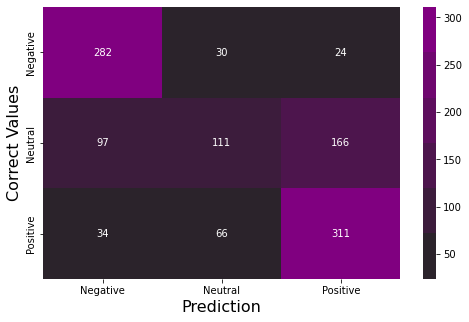

In [194]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout)

So model is working fine so let's train it for large no of epochs

#### RNN model larger epochs with dropout

In [195]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [199]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_large_epochs = Sequential()
rnn_model_dropout_large_epochs.add(text_encoder)
rnn_model_dropout_large_epochs.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_large_epochs.add(SimpleRNN(30, dropout= 0.8))
rnn_model_dropout_large_epochs.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_large_epochs'))

rnn_model_dropout_large_epochs.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [200]:
rnn_model_dropout_large_epochs.fit(x_train, y_train, epochs = 50, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/50
105/105 [==============================] - 39s 328ms/step - loss: 1.0605 - accuracy: 0.4628 - val_loss: 1.1020 - val_accuracy: 0.3488
Epoch 2/50
105/105 [==============================] - 31s 300ms/step - loss: 1.0237 - accuracy: 0.4699 - val_loss: 0.9515 - val_accuracy: 0.4746
Epoch 3/50
105/105 [==============================] - 26s 244ms/step - loss: 0.9367 - accuracy: 0.5432 - val_loss: 0.9525 - val_accuracy: 0.5129
Epoch 4/50
105/105 [==============================] - 28s 267ms/step - loss: 0.8986 - accuracy: 0.5887 - val_loss: 0.8236 - val_accuracy: 0.6093
Epoch 5/50
105/105 [==============================] - 28s 264ms/step - loss: 0.8349 - accuracy: 0.6366 - val_loss: 0.8472 - val_accuracy: 0.6334
Epoch 6/50
105/105 [==============================] - 31s 298ms/step - loss: 0.8449 - accuracy: 0.6226 - val_loss: 0.7224 - val_accuracy: 0.6967
Epoch 7/50
105/105 [==============================] - 27s 254ms/step - loss: 0.7418 - accuracy: 0.6878 - val_loss: 0.9032 - val_ac

In [205]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_large_epochs)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([2, 1, 0, 2, 0, 2], dtype=int64)

In [206]:
get_prediction('good phone', rnn_model_dropout_large_epochs)

2

In [203]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.82      0.85      0.83       937
           1       0.73      0.68      0.70      1210
           2       0.79      0.82      0.80      1213

    accuracy                           0.78      3360
   macro avg       0.78      0.78      0.78      3360
weighted avg       0.78      0.78      0.78      3360



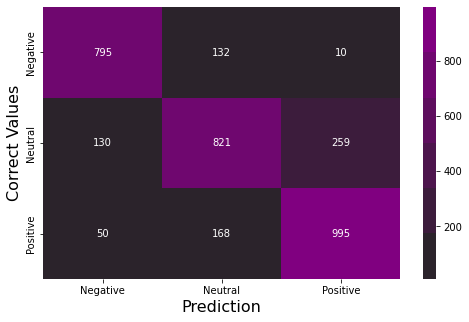

In [207]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_large_epochs)


               precision    recall  f1-score   support

           0       0.66      0.69      0.68       336
           1       0.46      0.47      0.46       374
           2       0.65      0.62      0.63       411

    accuracy                           0.59      1121
   macro avg       0.59      0.59      0.59      1121
weighted avg       0.59      0.59      0.59      1121



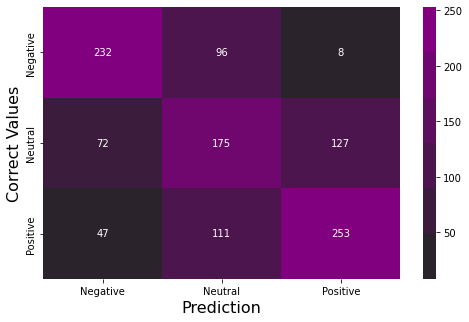

In [208]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_large_epochs)

### RNN model with smaller dropout

#### RNN model with dropout = 0.3

In [209]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.3

In [210]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_small = Sequential()
rnn_model_dropout_small.add(text_encoder)
rnn_model_dropout_small.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_small.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_small.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_small'))

rnn_model_dropout_small.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [211]:
rnn_model_dropout_small.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 41s 345ms/step - loss: 1.0386 - accuracy: 0.4821 - val_loss: 0.9901 - val_accuracy: 0.5058
Epoch 2/10
105/105 [==============================] - 30s 290ms/step - loss: 0.7782 - accuracy: 0.6494 - val_loss: 0.8266 - val_accuracy: 0.6209
Epoch 3/10
105/105 [==============================] - 25s 237ms/step - loss: 0.4986 - accuracy: 0.7917 - val_loss: 0.8947 - val_accuracy: 0.6690
Epoch 4/10
105/105 [==============================] - 25s 238ms/step - loss: 0.3780 - accuracy: 0.8479 - val_loss: 0.8029 - val_accuracy: 0.6869
Epoch 5/10
105/105 [==============================] - 27s 252ms/step - loss: 0.2755 - accuracy: 0.8964 - val_loss: 0.9202 - val_accuracy: 0.6994
Epoch 6/10
105/105 [==============================] - 24s 233ms/step - loss: 0.2407 - accuracy: 0.9095 - val_loss: 0.9596 - val_accuracy: 0.6913
Epoch 7/10
105/105 [==============================] - 30s 284ms/step - loss: 0.1962 - accuracy: 0.9283 - val_loss: 0.9514 - val_ac

In [212]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_small)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [213]:
get_prediction('good phone', rnn_model_dropout_small)

1

In [214]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.98      1.00      0.99       937
           1       0.96      0.97      0.97      1210
           2       0.99      0.96      0.98      1213

    accuracy                           0.98      3360
   macro avg       0.98      0.98      0.98      3360
weighted avg       0.98      0.98      0.98      3360



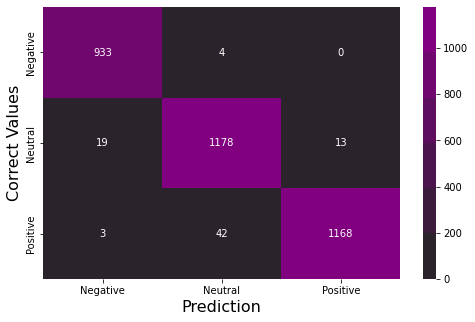

In [215]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_small)


               precision    recall  f1-score   support

           0       0.71      0.83      0.76       336
           1       0.54      0.52      0.53       374
           2       0.75      0.67      0.71       411

    accuracy                           0.67      1121
   macro avg       0.67      0.67      0.67      1121
weighted avg       0.67      0.67      0.67      1121



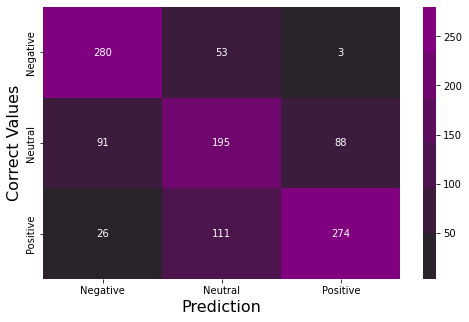

In [216]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_small)

#### RNN Model with dropout = 0.5

In [217]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.5

In [218]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_05 = Sequential()
rnn_model_dropout_05.add(text_encoder)
rnn_model_dropout_05.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_05.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_05.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_05'))

rnn_model_dropout_05.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [219]:
rnn_model_dropout_05.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 36s 296ms/step - loss: 1.0020 - accuracy: 0.4982 - val_loss: 0.8194 - val_accuracy: 0.6236
Epoch 2/10
105/105 [==============================] - 27s 260ms/step - loss: 0.7056 - accuracy: 0.6923 - val_loss: 0.6898 - val_accuracy: 0.6922
Epoch 3/10
105/105 [==============================] - 22s 211ms/step - loss: 0.5239 - accuracy: 0.7872 - val_loss: 0.8232 - val_accuracy: 0.6905
Epoch 4/10
105/105 [==============================] - 23s 224ms/step - loss: 0.5011 - accuracy: 0.7961 - val_loss: 0.7749 - val_accuracy: 0.6530
Epoch 5/10
105/105 [==============================] - 26s 251ms/step - loss: 0.5554 - accuracy: 0.7720 - val_loss: 0.7890 - val_accuracy: 0.6557
Epoch 6/10
105/105 [==============================] - 24s 224ms/step - loss: 0.4246 - accuracy: 0.8304 - val_loss: 0.7644 - val_accuracy: 0.7083
Epoch 7/10
105/105 [==============================] - 27s 254ms/step - loss: 0.3617 - accuracy: 0.8586 - val_loss: 0.7665 - val_ac

In [220]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_05)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 1, 0, 2, 0, 2], dtype=int64)

In [221]:
get_prediction('good phone', rnn_model_dropout_05)

1

In [222]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.96      0.99      0.98       937
           1       0.99      0.89      0.93      1210
           2       0.92      0.99      0.95      1213

    accuracy                           0.95      3360
   macro avg       0.96      0.96      0.95      3360
weighted avg       0.95      0.95      0.95      3360



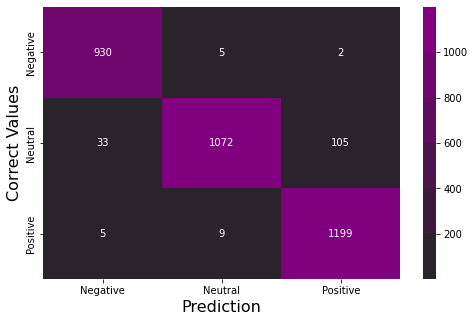

In [223]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_05)


               precision    recall  f1-score   support

           0       0.71      0.85      0.77       336
           1       0.66      0.46      0.54       374
           2       0.73      0.81      0.77       411

    accuracy                           0.71      1121
   macro avg       0.70      0.71      0.70      1121
weighted avg       0.70      0.71      0.69      1121



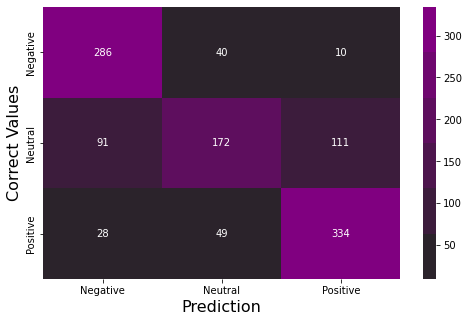

In [224]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_05)

Now model is bit improved, we can see training and validation accuracies are bit closed but let's try another model with 0.6 dropout

#### RNN model with dropout = 0.7

In [225]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.7

In [226]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_07 = Sequential()
rnn_model_dropout_07.add(text_encoder)
rnn_model_dropout_07.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_07.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_07.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_07'))

rnn_model_dropout_07.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [227]:
rnn_model_dropout_07.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 46s 392ms/step - loss: 1.0484 - accuracy: 0.4676 - val_loss: 0.9726 - val_accuracy: 0.5442
Epoch 2/10
105/105 [==============================] - 29s 279ms/step - loss: 0.8630 - accuracy: 0.6238 - val_loss: 0.7012 - val_accuracy: 0.6994
Epoch 3/10
105/105 [==============================] - 23s 223ms/step - loss: 0.8031 - accuracy: 0.6348 - val_loss: 0.7867 - val_accuracy: 0.6396
Epoch 4/10
105/105 [==============================] - 29s 280ms/step - loss: 0.6866 - accuracy: 0.7036 - val_loss: 0.7248 - val_accuracy: 0.7047
Epoch 5/10
105/105 [==============================] - 26s 247ms/step - loss: 0.6382 - accuracy: 0.7345 - val_loss: 0.7746 - val_accuracy: 0.6780
Epoch 6/10
105/105 [==============================] - 28s 268ms/step - loss: 0.6448 - accuracy: 0.7211 - val_loss: 0.7115 - val_accuracy: 0.7003
Epoch 7/10
105/105 [==============================] - 27s 256ms/step - loss: 0.5822 - accuracy: 0.7589 - val_loss: 0.7056 - val_ac

In [228]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_07)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [229]:
get_prediction('good phone', rnn_model_dropout_07)

1

In [230]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.93      0.90      0.92       937
           1       0.91      0.58      0.71      1210
           2       0.71      0.98      0.82      1213

    accuracy                           0.81      3360
   macro avg       0.85      0.82      0.82      3360
weighted avg       0.84      0.81      0.81      3360



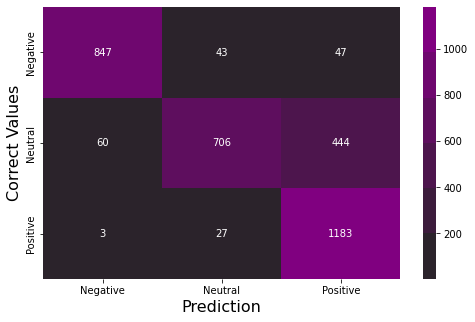

In [231]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_07)


               precision    recall  f1-score   support

           0       0.79      0.76      0.78       336
           1       0.69      0.39      0.49       374
           2       0.64      0.92      0.76       411

    accuracy                           0.69      1121
   macro avg       0.71      0.69      0.68      1121
weighted avg       0.70      0.69      0.67      1121



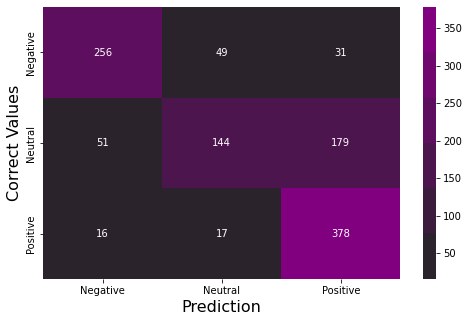

In [232]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_07)

#### NOTE
we tried RNN model with small epochs with dropout 0.3,0.5,0.7,0.8, i found out that may be we should go with bit complex model and try to train model with dropout 0.7 bit longer

#### RNN model with dropout = 0.7

In [233]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.7

In [234]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_07_longer = Sequential()
rnn_model_dropout_07_longer.add(text_encoder)
rnn_model_dropout_07_longer.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_dropout_07_longer.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_07_longer.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_07_longer'))

rnn_model_dropout_07_longer.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [235]:
rnn_model_dropout_07_longer.fit(x_train, y_train, epochs = 30, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/30
105/105 [==============================] - 43s 346ms/step - loss: 1.0659 - accuracy: 0.4387 - val_loss: 0.9712 - val_accuracy: 0.5575
Epoch 2/30
105/105 [==============================] - 29s 275ms/step - loss: 0.8589 - accuracy: 0.6137 - val_loss: 0.7574 - val_accuracy: 0.6699
Epoch 3/30
105/105 [==============================] - 24s 232ms/step - loss: 0.6878 - accuracy: 0.7122 - val_loss: 0.7409 - val_accuracy: 0.6860
Epoch 4/30
105/105 [==============================] - 23s 215ms/step - loss: 0.6777 - accuracy: 0.7188 - val_loss: 0.8002 - val_accuracy: 0.6494
Epoch 5/30
105/105 [==============================] - 27s 257ms/step - loss: 0.6142 - accuracy: 0.7467 - val_loss: 0.7396 - val_accuracy: 0.6985
Epoch 6/30
105/105 [==============================] - 22s 212ms/step - loss: 0.6104 - accuracy: 0.7524 - val_loss: 0.8177 - val_accuracy: 0.6824
Epoch 7/30
105/105 [==============================] - 23s 221ms/step - loss: 0.6134 - accuracy: 0.7467 - val_loss: 0.7139 - val_ac

In [237]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_07_longer)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([2, 2, 0, 2, 0, 2], dtype=int64)

In [246]:
get_prediction('good phone', rnn_model_dropout_07_longer)

2

In [239]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.71      0.91      0.80       937
           1       0.75      0.43      0.55      1210
           2       0.71      0.86      0.78      1213

    accuracy                           0.72      3360
   macro avg       0.72      0.73      0.71      3360
weighted avg       0.72      0.72      0.70      3360



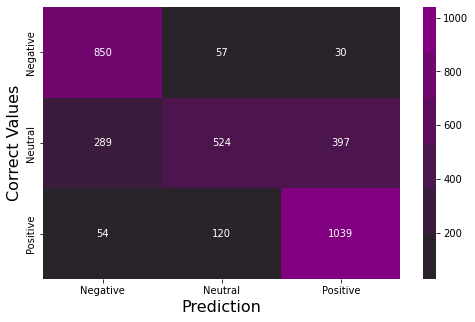

In [247]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_07_longer)


               precision    recall  f1-score   support

           0       0.64      0.82      0.72       336
           1       0.53      0.32      0.40       374
           2       0.66      0.75      0.70       411

    accuracy                           0.63      1121
   macro avg       0.61      0.63      0.61      1121
weighted avg       0.61      0.63      0.61      1121



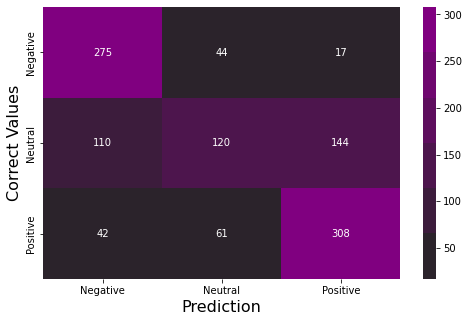

In [248]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_07_longer)

This model is performing worst, so let's try with 0.5 dropout. 
if that even is not working then i will increase complexity of model

#### RNN model with dropout = 0.5

In [268]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15
DROP_OUT = 0.5

In [269]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_dropout_05_longer = Sequential()
rnn_model_dropout_05_longer.add(text_encoder)
rnn_model_dropout_05_longer.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING))
rnn_model_dropout_05_longer.add(SimpleRNN(30, dropout= DROP_OUT))
rnn_model_dropout_05_longer.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_dropout_05_longer'))

rnn_model_dropout_05_longer.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [270]:
rnn_model_dropout_05_longer.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 34s 283ms/step - loss: 1.0794 - accuracy: 0.4176 - val_loss: 1.0736 - val_accuracy: 0.4193
Epoch 2/10
105/105 [==============================] - 24s 228ms/step - loss: 1.0350 - accuracy: 0.4643 - val_loss: 1.0369 - val_accuracy: 0.4755
Epoch 3/10
105/105 [==============================] - 25s 236ms/step - loss: 0.9745 - accuracy: 0.5039 - val_loss: 1.0521 - val_accuracy: 0.4871
Epoch 4/10
105/105 [==============================] - 21s 201ms/step - loss: 0.9253 - accuracy: 0.5301 - val_loss: 1.0607 - val_accuracy: 0.4888
Epoch 5/10
105/105 [==============================] - 22s 212ms/step - loss: 0.9045 - accuracy: 0.5426 - val_loss: 1.0236 - val_accuracy: 0.4951
Epoch 6/10
105/105 [==============================] - 21s 204ms/step - loss: 0.8706 - accuracy: 0.5664 - val_loss: 1.0609 - val_accuracy: 0.4692
Epoch 7/10
105/105 [==============================] - 22s 213ms/step - loss: 0.9369 - accuracy: 0.5396 - val_loss: 1.0379 - val_ac

In [271]:
rnn_model_dropout_05_longer.save(PATH+'rnn_model_dropout_05_longer.tf')

INFO:tensorflow:Assets written to: Model_files/rnn_model_dropout_05_longer.tf\assets


In [272]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_dropout_05_longer)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 0, 1, 1, 0, 1], dtype=int64)

In [273]:
get_prediction('good phone', rnn_model_dropout_05_longer)

1

In [274]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.65      0.50      0.57       937
           1       0.46      0.85      0.60      1210
           2       0.94      0.31      0.46      1213

    accuracy                           0.56      3360
   macro avg       0.68      0.55      0.54      3360
weighted avg       0.69      0.56      0.54      3360



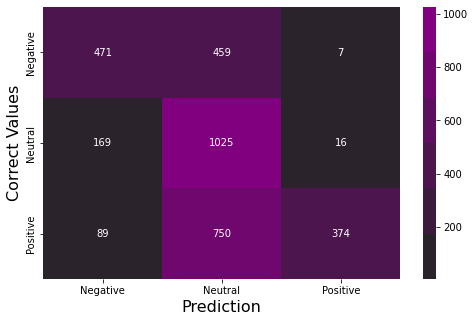

In [275]:
confusion_metrix_plot(x_train, y_train, rnn_model_dropout_05_longer)


               precision    recall  f1-score   support

           0       0.57      0.44      0.50       336
           1       0.41      0.83      0.55       374
           2       0.70      0.18      0.29       411

    accuracy                           0.48      1121
   macro avg       0.56      0.48      0.45      1121
weighted avg       0.57      0.48      0.44      1121



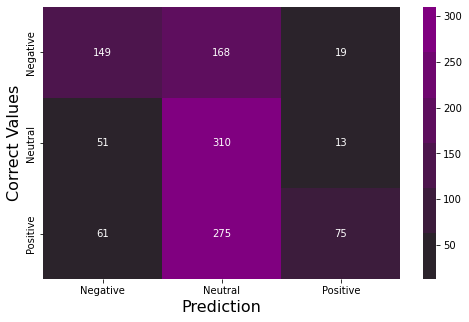

In [276]:
confusion_metrix_plot(x_val, y_val, rnn_model_dropout_05_longer)

Remember to set mark_zero to False, because if it equal to True model won't get saved

In [161]:
rnn_model_dropout_05_longer_reload = tf.keras.models.load_model('Model_files/rnn_model_dropout_05_longer.tf')

In [162]:
rnn_model_dropout_05_longer_reload.evaluate(x_train, y_train)

105/105 [==============================] - 12s 105ms/step - loss: 1.3571 - accuracy: 0.3938


[1.3570626974105835, 0.39375001192092896]

In [278]:
rnn_model_dropout_05_longer_reload.fit(x_train, y_train, epochs = 10, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/10


G:\python_virtual_env\myenv\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/simple_rnn_11/RaggedToTensor/boolean_mask_1/GatherV2:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/simple_rnn_11/RaggedToTensor/boolean_mask/GatherV2:0", shape=(None, 15), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/simple_rnn_11/RaggedToTensor/Shape:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


105/105 [==============================] - 77s 709ms/step - loss: 1.0871 - accuracy: 0.4226 - val_loss: 0.9566 - val_accuracy: 0.5219
Epoch 2/10
 74/105 [====================>.........] - ETA: 19s - loss: 0.9662 - accuracy: 0.5270

#### NOTE
why RNN?? Why?? As we can see the model is not training much better, let's try to run simplest model for higher epochs or upto overfitting

### Overfit model

In [257]:
tf.random.set_seed(4)
VOCAB_SIZE = 5600
SENTENCE_LENGTH = 30
EMBEDDING = 15

In [258]:
tf.random.set_seed(4)
text_encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
text_encoder.adapt(x_train)
rnn_model_for_overfit = Sequential()
rnn_model_for_overfit.add(text_encoder)
rnn_model_for_overfit.add(Embedding(input_dim= VOCAB_SIZE-2, output_dim= EMBEDDING, mask_zero= True))
rnn_model_for_overfit.add(SimpleRNN(30))
rnn_model_for_overfit.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir_('rnn_model_for_overfit'))

rnn_model_for_overfit.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])



In [259]:
rnn_model_for_overfit.fit(x_train, y_train, epochs = 50, 
 validation_data = (x_val, y_val), callbacks = [tensorboard_callback])

Epoch 1/50
105/105 [==============================] - 42s 359ms/step - loss: 0.9468 - accuracy: 0.5402 - val_loss: 0.7870 - val_accuracy: 0.6815
Epoch 2/50
105/105 [==============================] - 36s 340ms/step - loss: 0.5331 - accuracy: 0.7815 - val_loss: 0.7253 - val_accuracy: 0.6878
Epoch 3/50
105/105 [==============================] - 30s 282ms/step - loss: 0.3113 - accuracy: 0.8759 - val_loss: 0.8295 - val_accuracy: 0.6994
Epoch 4/50
105/105 [==============================] - 26s 250ms/step - loss: 0.1578 - accuracy: 0.9458 - val_loss: 0.9950 - val_accuracy: 0.6771
Epoch 5/50
105/105 [==============================] - 27s 257ms/step - loss: 0.1183 - accuracy: 0.9598 - val_loss: 1.1543 - val_accuracy: 0.6789
Epoch 6/50
105/105 [==============================] - 27s 254ms/step - loss: 0.1304 - accuracy: 0.9565 - val_loss: 1.2437 - val_accuracy: 0.6521
Epoch 7/50
105/105 [==============================] - 27s 260ms/step - loss: 0.1773 - accuracy: 0.9342 - val_loss: 1.4547 - val_ac

In [260]:
review_list = ['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']
get_prediction(review_list, rnn_model_for_overfit)
# np.argmax(rnn_model_dropout.predict(review_list), axis = 1)

array([1, 2, 0, 0, 0, 2], dtype=int64)

In [261]:
get_prediction('good phone', rnn_model_for_overfit)

1

In [262]:
get_prediction(review_list, rnn_model)

array([1, 1, 0, 1, 0, 2], dtype=int64)


               precision    recall  f1-score   support

           0       0.94      0.94      0.94       937
           1       0.90      0.87      0.89      1210
           2       0.91      0.93      0.92      1213

    accuracy                           0.91      3360
   macro avg       0.92      0.92      0.92      3360
weighted avg       0.91      0.91      0.91      3360



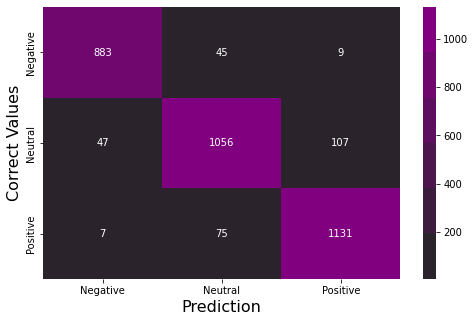

In [263]:
confusion_metrix_plot(x_train, y_train, rnn_model_for_overfit)


               precision    recall  f1-score   support

           0       0.68      0.76      0.72       336
           1       0.51      0.43      0.47       374
           2       0.64      0.67      0.65       411

    accuracy                           0.62      1121
   macro avg       0.61      0.62      0.61      1121
weighted avg       0.61      0.62      0.61      1121



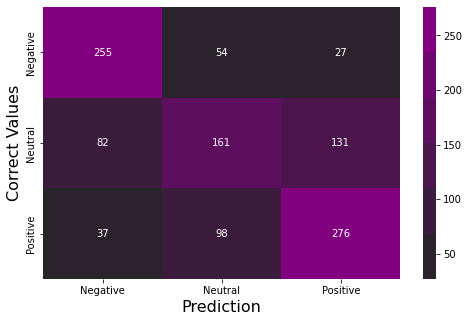

In [264]:
confusion_metrix_plot(x_val, y_val, rnn_model_for_overfit)

### Note
No success with longer epochs, so now lets try complex model

### Making complex model

#### RNN model Complex 

In [69]:
log_dir_fun

'neural_2_logs/'

In [70]:
log_dir_fun = 'neural_2_logs/complex_model/'
SENTENCE_LENGTH = 50
EMBEDDING = 30
VOCAB_SIZE = 5600

In [71]:
tf.random.set_seed(4)
encoder = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length= SENTENCE_LENGTH)
encoder.adapt(x_train)
rnn_model_complex = Sequential()
rnn_model_complex.add(encoder)
rnn_model_complex.add(Embedding(VOCAB_SIZE-2, EMBEDDING))
rnn_model_complex.add(SimpleRNN(SENTENCE_LENGTH))
rnn_model_complex.add(Dense(3, activation = 'softmax'))

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= log_dir_('rnn_complex'))

rnn_model_complex.compile(optimizer= tf.keras.optimizers.Adam(), loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics= ['accuracy'])

In [72]:
rnn_model_complex.fit(x_train, y_train, epochs = 10, validation_data = [x_val, y_val]
, callbacks = [tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 38s 307ms/step - loss: 1.0508 - accuracy: 0.4688 - val_loss: 1.0390 - val_accuracy: 0.4799
Epoch 2/10
105/105 [==============================] - 28s 269ms/step - loss: 0.8661 - accuracy: 0.5958 - val_loss: 0.8703 - val_accuracy: 0.6048
Epoch 3/10
105/105 [==============================] - 24s 226ms/step - loss: 0.6286 - accuracy: 0.7443 - val_loss: 0.8408 - val_accuracy: 0.6414
Epoch 4/10
105/105 [==============================] - 25s 237ms/step - loss: 0.4237 - accuracy: 0.8521 - val_loss: 0.8483 - val_accuracy: 0.6655
Epoch 5/10
105/105 [==============================] - 24s 226ms/step - loss: 0.2887 - accuracy: 0.9024 - val_loss: 0.8789 - val_accuracy: 0.6833
Epoch 6/10
105/105 [==============================] - 25s 240ms/step - loss: 0.2216 - accuracy: 0.9280 - val_loss: 0.9616 - val_accuracy: 0.6744
Epoch 7/10
105/105 [==============================] - 24s 231ms/step - loss: 0.1701 - accuracy: 0.9449 - val_loss: 1.0953 - val_ac

In [82]:
rnn_model_complex.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 50, 30)            167940    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


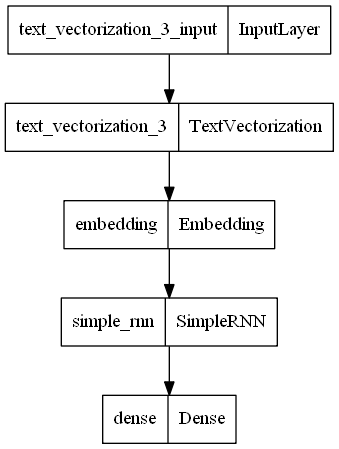

In [83]:

tf.keras.utils.plot_model(rnn_model_complex)

In [84]:
print(review_list)
get_prediction(review_list, rnn_model_complex)

['Good phone', 'best phone', 'worst phone', 'i love this phone', 'bad phone', 'good phone with good camera']


array([1, 1, 0, 0, 0, 1], dtype=int64)


               precision    recall  f1-score   support

           0       1.00      0.98      0.99       937
           1       0.98      0.99      0.98      1210
           2       1.00      0.99      0.99      1213

    accuracy                           0.99      3360
   macro avg       0.99      0.99      0.99      3360
weighted avg       0.99      0.99      0.99      3360



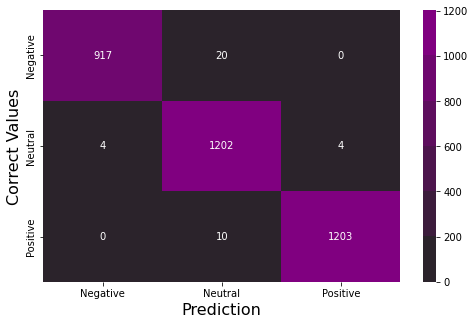

In [85]:
confusion_metrix_plot(x_train, y_train, rnn_model_complex)


               precision    recall  f1-score   support

           0       0.65      0.72      0.68       336
           1       0.57      0.67      0.62       374
           2       0.78      0.58      0.67       411

    accuracy                           0.65      1121
   macro avg       0.67      0.66      0.66      1121
weighted avg       0.67      0.65      0.66      1121



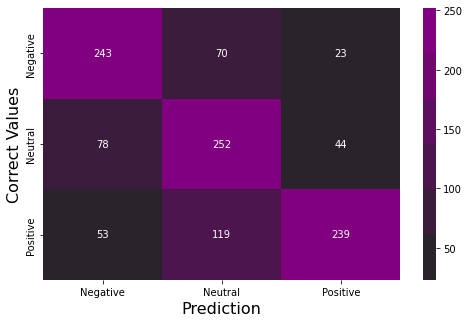

In [86]:
confusion_metrix_plot(x_val, y_val, rnn_model_complex)

So we can see that the model accuracy is getting better, but because of randomness it is changing.

Let's try this models with some regularization and dropout

#### RNN Model complex with dropout

In [90]:
log_dir_fun = 'neural_2_logs/complex_model/'
SENTENCE_LENGTH = 50
EMBEDDING = 30
VOCAB_SIZE = 5600
DROP_OUT = 0.3
MODEL_NAME = 'rnn_model_complex_dropout'

rnn_model_complex_dropout, history = rnn_model_func(VOCAB_SIZE, SENTENCE_LENGTH, EMBEDDING, MODEL_NAME, log_dir_fun, DROPOUT = DROP_OUT)

Epoch 1/10
105/105 [==============================] - 42s 355ms/step - loss: 1.0099 - accuracy: 0.4848 - val_loss: 0.8771 - val_accuracy: 0.6191
Epoch 2/10
105/105 [==============================] - 31s 298ms/step - loss: 0.7492 - accuracy: 0.6911 - val_loss: 0.7249 - val_accuracy: 0.6931
Epoch 3/10
105/105 [==============================] - 28s 267ms/step - loss: 0.5734 - accuracy: 0.7670 - val_loss: 0.7385 - val_accuracy: 0.7190
Epoch 4/10
105/105 [==============================] - 35s 337ms/step - loss: 0.4521 - accuracy: 0.8301 - val_loss: 0.6692 - val_accuracy: 0.7377
Epoch 5/10
105/105 [==============================] - 40s 379ms/step - loss: 0.3343 - accuracy: 0.8783 - val_loss: 0.6473 - val_accuracy: 0.7654
Epoch 6/10
105/105 [==============================] - 34s 325ms/step - loss: 0.2569 - accuracy: 0.9107 - val_loss: 0.7745 - val_accuracy: 0.7163
Epoch 7/10
105/105 [==============================] - 30s 286ms/step - loss: 0.2389 - accuracy: 0.9161 - val_loss: 0.8419 - val_ac

In [100]:
get_prediction(review_list, rnn_model_complex_dropout)

AttributeError: 'tuple' object has no attribute 'predict'

Sorry this is error because of history obj, get stored in **rnn_model_complex_dropout** name

In [98]:
rnn_model_complex_dropout

(<keras.engine.sequential.Sequential at 0x21bc95b8970>,
 <keras.callbacks.History at 0x21c93ab8c70>)

So now we can see that the model is performing well, let's try to increase epochs and dropout

#### RNN model complex dropout = 0.5

In [101]:
log_dir_fun = 'neural_2_logs/complex_model/'
SENTENCE_LENGTH = 50
EMBEDDING = 30
VOCAB_SIZE = 5600
DROP_OUT = 0.5
MODEL_NAME = 'rnn_model_complex_dropout_05'
EPOCHS = 20

rnn_model_complex_dropout_05, history = rnn_model_func(VOCAB_SIZE, SENTENCE_LENGTH, EMBEDDING, MODEL_NAME, log_dir_fun, 
        DROPOUT = DROP_OUT, EPOCHS= EPOCHS)

Epoch 1/20
105/105 [==============================] - 42s 385ms/step - loss: 0.9861 - accuracy: 0.5199 - val_loss: 0.8414 - val_accuracy: 0.6583
Epoch 2/20
105/105 [==============================] - 38s 367ms/step - loss: 0.6947 - accuracy: 0.6982 - val_loss: 0.6449 - val_accuracy: 0.7386
Epoch 3/20
105/105 [==============================] - 28s 266ms/step - loss: 0.5590 - accuracy: 0.7688 - val_loss: 0.5926 - val_accuracy: 0.7520
Epoch 4/20
105/105 [==============================] - 26s 252ms/step - loss: 0.4791 - accuracy: 0.8045 - val_loss: 0.6504 - val_accuracy: 0.7235
Epoch 5/20
105/105 [==============================] - 29s 277ms/step - loss: 0.3492 - accuracy: 0.8756 - val_loss: 0.5149 - val_accuracy: 0.8011
Epoch 6/20
105/105 [==============================] - 28s 264ms/step - loss: 0.2764 - accuracy: 0.8908 - val_loss: 0.6068 - val_accuracy: 0.7600
Epoch 7/20
105/105 [==============================] - 27s 254ms/step - loss: 0.2132 - accuracy: 0.9241 - val_loss: 0.5786 - val_ac

In [102]:
get_prediction(review_list, rnn_model_complex_dropout_05)

array([1, 1, 0, 2, 0, 2], dtype=int64)

In [103]:
review_list

['Good phone',
 'best phone',
 'worst phone',
 'i love this phone',
 'bad phone',
 'good phone with good camera']


               precision    recall  f1-score   support

           0       0.96      0.99      0.98       937
           1       0.99      0.96      0.98      1210
           2       0.97      0.97      0.97      1213

    accuracy                           0.97      3360
   macro avg       0.97      0.97      0.97      3360
weighted avg       0.97      0.97      0.97      3360



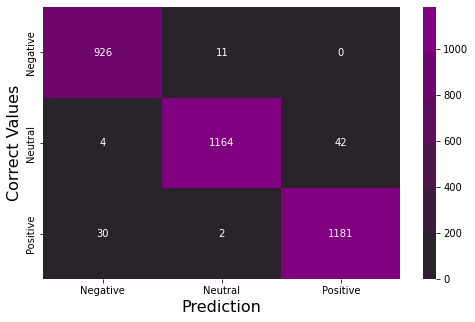

In [104]:
confusion_metrix_plot(x_train, y_train, rnn_model_complex_dropout_05)


               precision    recall  f1-score   support

           0       0.75      0.80      0.77       336
           1       0.69      0.61      0.65       374
           2       0.78      0.82      0.80       411

    accuracy                           0.74      1121
   macro avg       0.74      0.74      0.74      1121
weighted avg       0.74      0.74      0.74      1121



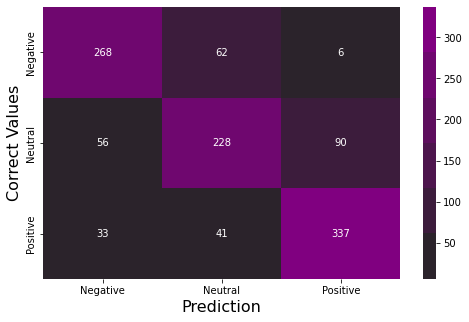

In [105]:
confusion_metrix_plot(x_val, y_val, rnn_model_complex_dropout_05 )

In [106]:
PATH

'Model_files/'

In [110]:
rnn_model_complex_dropout_05.save(PATH + 'rnn_model_complex_dropout_05_'+datetime.datetime.now().strftime('%d-%m-%y_%H%M')+'.tf' )

INFO:tensorflow:Assets written to: Model_files/rnn_model_complex_dropout_05_28-01-22_1826.tf\assets


In [108]:
rnn_model_complex_dropout_05.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_5 (TextV  (None, 50)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 50, 30)            167940    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


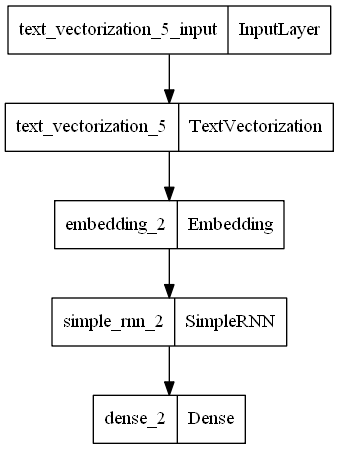

In [109]:
tf.keras.utils.plot_model(rnn_model_complex_dropout_05)

#### RNN model complex dropout = 0.7
The previous model is good working lets increase dropout and epochs

In [15]:
log_dir_fun = 'neural_2_logs/complex_model/'
SENTENCE_LENGTH = 50
EMBEDDING = 30
VOCAB_SIZE = 5600
DROP_OUT = 0.7
MODEL_NAME = 'rnn_model_complex_dropout_07'
EPOCH = 30

rnn_model_complex_dropout_07, history = rnn_model_func(VOCAB_SIZE, SENTENCE_LENGTH, EMBEDDING,
 MODEL_NAME, log_dir_fun, DROPOUT = DROP_OUT, EPOCHS= EPOCH)

Epoch 1/30
105/105 [==============================] - 48s 254ms/step - loss: 1.0529 - accuracy: 0.4720 - val_loss: 1.0108 - val_accuracy: 0.5156
Epoch 2/30
105/105 [==============================] - 26s 251ms/step - loss: 0.9852 - accuracy: 0.5301 - val_loss: 0.8833 - val_accuracy: 0.5959
Epoch 3/30
105/105 [==============================] - 24s 228ms/step - loss: 0.8404 - accuracy: 0.6030 - val_loss: 0.9398 - val_accuracy: 0.6039
Epoch 4/30
105/105 [==============================] - 26s 243ms/step - loss: 0.7564 - accuracy: 0.6637 - val_loss: 0.7347 - val_accuracy: 0.6682
Epoch 5/30
105/105 [==============================] - 23s 217ms/step - loss: 0.6163 - accuracy: 0.7369 - val_loss: 0.7040 - val_accuracy: 0.6994
Epoch 6/30
105/105 [==============================] - 24s 228ms/step - loss: 0.5384 - accuracy: 0.7693 - val_loss: 0.6180 - val_accuracy: 0.7351
Epoch 7/30
105/105 [==============================] - 27s 255ms/step - loss: 0.4692 - accuracy: 0.8110 - val_loss: 0.7510 - val_ac

In [16]:
# save_model_dir(rnn_model_complex_dropout_07, 'rnn_model_complex_droput_07')
# Model is saved with name Model_files/rnn_model_complex_droput_07_28_01_22-18_51_52.tf

In [17]:
# rnn_model_complex_dropout_07.fit(x_train, y_train, epochs = 10, validation_data = [x_val, y_val])

In [19]:
# save_model_dir(rnn_model_complex_dropout_07, 'rnn_model_complex_dropout_07(2)')

In [20]:
# rnn_model_complex_dropout_07.fit(x_train, y_train, epochs = 5, validation_data = [x_val, y_val], callbacks = [tensorboard_callback])

In [21]:
# from tensorflow import keras
# from keras.backend import manual_variable_initialization 
# manual_variable_initialization(True)

In [32]:
datetime.datetime.now().strftime('%d_%m_%y')

'29_01_22'

In [33]:
PATH
PATH = 'Model_files/'+ datetime.datetime.now().strftime('%d_%m_%y')+'/'
PATH

'Model_files/29_01_22/'

In [35]:
save_model_dir(rnn_model_complex_dropout_07, 'rnn_model_complex_dropout_07', PATH = PATH)

INFO:tensorflow:Assets written to: Model_files/29_01_22/rnn_model_complex_dropout_07_29_01_22-10_14_42.tf\assets
Model is saved with name Model_files/29_01_22/rnn_model_complex_dropout_07_29_01_22-10_14_42.tf


In [147]:
config = rnn_model_complex_dropout_07.to_json()

In [148]:
config

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, null], "dtype": "string", "sparse": false, "ragged": false, "name": "text_vectorization_6_input"}}, {"class_name": "TextVectorization", "config": {"name": "text_vectorization_6", "trainable": true, "batch_input_shape": [null, null], "dtype": "string", "max_tokens": 5600, "standardize": "lower_and_strip_punctuation", "split": "whitespace", "ngrams": null, "output_mode": "int", "output_sequence_length": 50, "pad_to_max_tokens": false, "sparse": false, "ragged": false, "vocabulary": null, "idf_weights": null}}, {"class_name": "Embedding", "config": {"name": "embedding_3", "trainable": true, "batch_input_shape": [null, null], "dtype": "float32", "input_dim": 5598, "output_dim": 30, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "embeddings_regularizer": null, "activity_regulariz

So we can see the good accuracy the highest is about 81% on test and training is 93%.

The accuracy is not increasing even if we train it for longer it is getting stuck between 70-80 and 90-96 for validation and training data

In [36]:
rnn_model_complex_dropout_07_reload = load_model('Model_files/29_01_22/rnn_model_complex_dropout_07_29_01_22-10_14_42.tf')

In [37]:
rnn_model_complex_dropout_07.evaluate(x_train, y_train)

105/105 [==============================] - 2s 23ms/step - loss: 0.0743 - accuracy: 0.9774


[0.07425037026405334, 0.9773809313774109]

In [38]:
rnn_model_complex_dropout_07.evaluate(x_val, y_val)

36/36 [==============================] - 1s 38ms/step - loss: 0.7766 - accuracy: 0.7734


[0.7765834927558899, 0.7734165787696838]

In [39]:
rnn_model_complex_dropout_07_reload.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 30)          167940    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


In [40]:
rnn_model_complex_dropout_07_reload.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, None),
    'dtype': 'string',
    'sparse': False,
    'ragged': False,
    'name': 'text_vectorization_input'}},
  {'class_name': 'TextVectorization',
   'config': {'name': 'text_vectorization',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'string',
    'max_tokens': 5600,
    'standardize': 'lower_and_strip_punctuation',
    'split': 'whitespace',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 50,
    'pad_to_max_tokens': False,
    'sparse': False,
    'ragged': False,
    'vocabulary': None,
    'idf_weights': None}},
  {'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'input_dim': 5598,
    'output_dim': 30,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 

In [41]:
rnn_model_complex_dropout_07_reload.get_weights()

[array([b'phone', b'good', b'camera', ..., b'84', b'83', b'82'],
       dtype=object),
 array([[-1.0585334e-02, -1.0633735e-03, -4.8149768e-03, ...,
          4.4952463e-03,  3.5226326e-03,  9.9754846e-04],
        [-7.2330078e-03,  3.2649796e-02, -4.0756006e-02, ...,
         -1.2735005e-01,  2.9516164e-02,  3.6591183e-02],
        [-6.2538995e-03, -2.8282957e-02,  5.8211298e-03, ...,
         -6.7559435e-05, -9.5959622e-03,  1.1544332e-02],
        ...,
        [ 9.3411565e-02,  1.2686258e-02,  7.0251346e-02, ...,
         -5.4232746e-02, -4.3881278e-02, -2.2721140e-02],
        [-3.9449368e-02, -2.7629741e-02,  1.9600507e-02, ...,
          3.5988044e-02,  6.8516806e-02, -1.0590380e-01],
        [ 3.8414735e-03,  5.5680010e-02, -1.4033995e-02, ...,
         -6.6306867e-02,  1.8598350e-02,  2.9217230e-02]], dtype=float32),
 array([[ 0.20198868,  0.04752504, -0.1644965 , ...,  0.11030038,
         -0.13379845, -0.1106583 ],
        [-0.11483695,  0.0328915 ,  0.08289868, ...,  0.06043

In [42]:
rnn_model_complex_dropout_07.get_weights()

[array([b'phone', b'good', b'camera', ..., b'84', b'83', b'82'],
       dtype=object),
 array([[-1.0585334e-02, -1.0633735e-03, -4.8149768e-03, ...,
          4.4952463e-03,  3.5226326e-03,  9.9754846e-04],
        [-7.2330078e-03,  3.2649796e-02, -4.0756006e-02, ...,
         -1.2735005e-01,  2.9516164e-02,  3.6591183e-02],
        [-6.2538995e-03, -2.8282957e-02,  5.8211298e-03, ...,
         -6.7559435e-05, -9.5959622e-03,  1.1544332e-02],
        ...,
        [ 9.3411565e-02,  1.2686258e-02,  7.0251346e-02, ...,
         -5.4232746e-02, -4.3881278e-02, -2.2721140e-02],
        [-3.9449368e-02, -2.7629741e-02,  1.9600507e-02, ...,
          3.5988044e-02,  6.8516806e-02, -1.0590380e-01],
        [ 3.8414735e-03,  5.5680010e-02, -1.4033995e-02, ...,
         -6.6306867e-02,  1.8598350e-02,  2.9217230e-02]], dtype=float32),
 array([[ 0.20198868,  0.04752504, -0.1644965 , ...,  0.11030038,
         -0.13379845, -0.1106583 ],
        [-0.11483695,  0.0328915 ,  0.08289868, ...,  0.06043

In [43]:
import os

In [44]:
# os.mkdir('weights')

In [45]:
rnn_model_complex_dropout_07.save_weights('weights/save_weight.tf')

In [46]:
# rnn_model_complex_dropout_07_reload.load_weights('weights/save_weight.tf')

In [47]:
# rnn_model_complex_dropout_07_reload.get_weights()

In [48]:
rnn_model_complex_dropout_07_reload.evaluate(x_train, y_train)

105/105 [==============================] - 11s 103ms/step - loss: 0.7530 - accuracy: 0.6759


[0.7530234456062317, 0.6758928298950195]

In [49]:
get_prediction(review_list, rnn_model_complex_dropout_07)

array([1, 1, 0, 1, 0, 2], dtype=int64)

In [50]:
review_list

['Good phone',
 'best phone',
 'worst phone',
 'i love this phone',
 'bad phone',
 'good phone with good camera']

In [51]:
rnn_model_complex_dropout_07.predict(['this phone is good but camera is bad'])

array([[0.00472907, 0.9831192 , 0.01215182]], dtype=float32)


               precision    recall  f1-score   support

           0       1.00      0.96      0.98       937
           1       0.94      1.00      0.97      1210
           2       1.00      0.97      0.98      1213

    accuracy                           0.98      3360
   macro avg       0.98      0.98      0.98      3360
weighted avg       0.98      0.98      0.98      3360



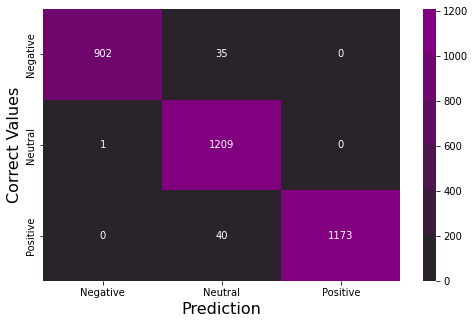

In [52]:
confusion_metrix_plot(x_train, y_train, rnn_model_complex_dropout_07)


               precision    recall  f1-score   support

           0       0.94      0.73      0.82       336
           1       0.62      0.90      0.73       374
           2       0.91      0.70      0.79       411

    accuracy                           0.77      1121
   macro avg       0.82      0.77      0.78      1121
weighted avg       0.82      0.77      0.78      1121



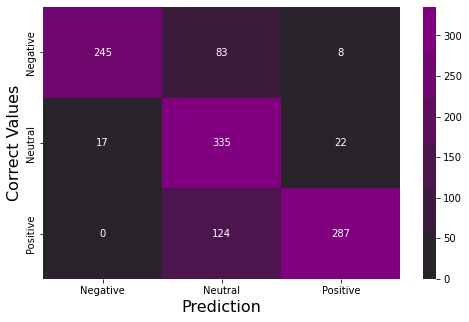

In [53]:
confusion_metrix_plot(x_val, y_val, rnn_model_complex_dropout_07)

##### Let's try to find difference between trained model and loaded model

In [54]:
rnn_model_complex_dropout_07.evaluate(x_train, y_train)

105/105 [==============================] - 2s 23ms/step - loss: 0.0743 - accuracy: 0.9774


[0.07425037026405334, 0.9773809313774109]

In [55]:
rnn_model_complex_07_loaded = tf.keras.models.load_model('Model_files/29_01_22/rnn_model_complex_dropout_07_29_01_22-10_14_42.tf')

In [56]:
rnn_model_complex_07_loaded.evaluate(x_train, y_train)

105/105 [==============================] - 10s 88ms/step - loss: 0.7530 - accuracy: 0.6759


[0.7530234456062317, 0.6758928298950195]

So we can see there is huge difference between trained and loaded model

Let's try to find what is difference between them, but to do that first we need to know which are this things that make the model, i know some of them like
1. weights
2. configuration

but i have one question that this problem my arise due to dropout to lets try one model without dropout but little complex that above

##### Model without dropout

In [188]:
log_dir_fun = 'neural_2_logs/complex_model/'
SENTENCE_LENGTH = 60
EMBEDDING = 40
VOCAB_SIZE = 5600
DROP_OUT = 0
MODEL_NAME = 'rnn_model_complex_without_dropout'
EPOCH = 30

encoder_without = TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=SENTENCE_LENGTH)
encoder_without.adapt(x_train)

rnn_model_complex_without_dropout = Sequential()
rnn_model_complex_without_dropout.add(encoder_without)
rnn_model_complex_without_dropout.add(Embedding(VOCAB_SIZE-2, EMBEDDING, input_length=SENTENCE_LENGTH))
rnn_model_complex_without_dropout.add(SimpleRNN(SENTENCE_LENGTH))
rnn_model_complex_without_dropout.add(Dense(3, activation= 'softmax'))

rnn_model_complex_without_dropout.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= 'neural_2_logs/complex_without_dropout/')

In [189]:
rnn_model_complex_without_dropout.fit(x_train, y_train, epochs = EPOCH, 
    validation_data = [x_val, y_val], callbacks = [tensorboard_callback])

Epoch 1/30
105/105 [==============================] - 45s 375ms/step - loss: 1.0341 - accuracy: 0.4807 - val_loss: 0.9657 - val_accuracy: 0.5370
Epoch 2/30
105/105 [==============================] - 35s 332ms/step - loss: 0.7842 - accuracy: 0.6676 - val_loss: 0.7917 - val_accuracy: 0.6378
Epoch 3/30
105/105 [==============================] - 28s 268ms/step - loss: 0.4977 - accuracy: 0.8092 - val_loss: 0.7426 - val_accuracy: 0.6878
Epoch 4/30
105/105 [==============================] - 28s 266ms/step - loss: 0.3173 - accuracy: 0.8854 - val_loss: 0.9463 - val_accuracy: 0.6530
Epoch 5/30
105/105 [==============================] - 27s 253ms/step - loss: 0.2849 - accuracy: 0.9015 - val_loss: 0.9055 - val_accuracy: 0.6789
Epoch 6/30
105/105 [==============================] - 28s 262ms/step - loss: 0.1596 - accuracy: 0.9485 - val_loss: 0.9408 - val_accuracy: 0.6717
Epoch 7/30
105/105 [==============================] - 27s 258ms/step - loss: 0.1351 - accuracy: 0.9604 - val_loss: 0.9637 - val_ac


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       937
           1       1.00      1.00      1.00      1210
           2       1.00      1.00      1.00      1213

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360



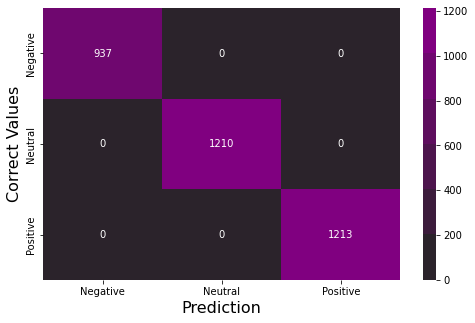

In [190]:
confusion_metrix_plot(x_train, y_train, rnn_model_complex_without_dropout )


               precision    recall  f1-score   support

           0       0.69      0.73      0.71       336
           1       0.58      0.65      0.61       374
           2       0.76      0.65      0.70       411

    accuracy                           0.67      1121
   macro avg       0.68      0.67      0.67      1121
weighted avg       0.68      0.67      0.67      1121



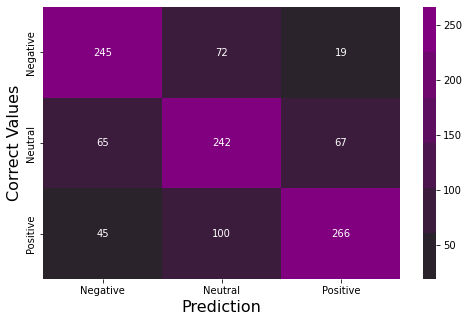

In [191]:
confusion_metrix_plot(x_val, y_val, rnn_model_complex_without_dropout)

In [192]:
rnn_model_complex_without_dropout.save('Model_files/rnn_model_complex_without_dropout.tf')

INFO:tensorflow:Assets written to: Model_files/rnn_model_complex_without_dropout.tf\assets


In [193]:
loaded_rnn_without_dropout = tf.keras.models.load_model('Model_files/rnn_model_complex_without_dropout.tf')

In [194]:
loaded_rnn_without_dropout.evaluate(x_train, y_train)

105/105 [==============================] - 12s 107ms/step - loss: 1.9909 - accuracy: 0.4173


[1.9908589124679565, 0.41726189851760864]

##### Conclusion

So it is clear that, problem in model loading is not because of dropout. 

it is something else
##### Let's continoue our investigation

##### Compare Structure of Models

In [57]:
rnn_model_complex_dropout_07.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 50, 30)            167940    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


In [58]:
rnn_model_complex_07_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 30)          167940    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


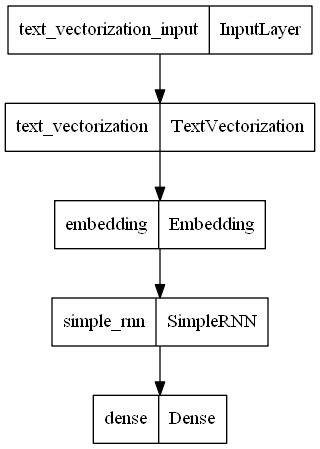

In [59]:
tf.keras.utils.plot_model(rnn_model_complex_dropout_07)

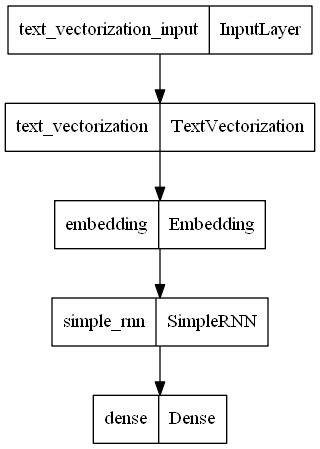

In [60]:
tf.keras.utils.plot_model(rnn_model_complex_07_loaded)

In [61]:
rnn_config_train = rnn_model_complex_dropout_07.get_config()
rnn_config_train

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, None),
    'dtype': 'string',
    'sparse': False,
    'ragged': False,
    'name': 'text_vectorization_input'}},
  {'class_name': 'TextVectorization',
   'config': {'name': 'text_vectorization',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'string',
    'max_tokens': 5600,
    'standardize': 'lower_and_strip_punctuation',
    'split': 'whitespace',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 50,
    'pad_to_max_tokens': False,
    'sparse': False,
    'ragged': False,
    'vocabulary': None,
    'idf_weights': None}},
  {'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'input_dim': 5598,
    'output_dim': 30,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 

In [62]:
rnn_config_load=rnn_model_complex_07_loaded.get_config()
rnn_config_load

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, None),
    'dtype': 'string',
    'sparse': False,
    'ragged': False,
    'name': 'text_vectorization_input'}},
  {'class_name': 'TextVectorization',
   'config': {'name': 'text_vectorization',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'string',
    'max_tokens': 5600,
    'standardize': 'lower_and_strip_punctuation',
    'split': 'whitespace',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 50,
    'pad_to_max_tokens': False,
    'sparse': False,
    'ragged': False,
    'vocabulary': None,
    'idf_weights': None}},
  {'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'input_dim': 5598,
    'output_dim': 30,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 

In [63]:
rnn_config_load == rnn_config_train

True

Hence Config also same

In [65]:
rnn_model_complex_dropout_07.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 50)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 50, 30)            167940    
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                4050      
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 172,143
Trainable params: 172,143
Non-trainable params: 0
_________________________________________________________________


In [64]:
rnn_model_complex_dropout_07.layers

##### Let's compare weights of two models

In [75]:
embedding_layer_train =rnn_model_complex_dropout_07.get_layer('embedding').get_weights()[0]
embedding_layer_load = rnn_model_complex_07_loaded.get_layer('embedding').get_weights()[0]

In [77]:
(embedding_layer_train == embedding_layer_load).all()

True

In [88]:
text_vectorization_train = rnn_model_complex_dropout_07.get_layer('text_vectorization').get_weights()[0]

In [97]:
rnn_config_train['layers'][1]

{'class_name': 'TextVectorization',
 'config': {'name': 'text_vectorization',
  'trainable': True,
  'batch_input_shape': (None, None),
  'dtype': 'string',
  'max_tokens': 5600,
  'standardize': 'lower_and_strip_punctuation',
  'split': 'whitespace',
  'ngrams': None,
  'output_mode': 'int',
  'output_sequence_length': 50,
  'pad_to_max_tokens': False,
  'sparse': False,
  'ragged': False,
  'vocabulary': None,
  'idf_weights': None}}

In [102]:
weight_set_embedding = rnn_model_complex_dropout_07.get_layer('text_vectorization').get_weights()

In [115]:
embedding_complete_layer = rnn_model_complex_dropout_07.get_layer('text_vectorization')
embedding_complete_layer_load = rnn_model_complex_07_loaded.get_layer('text_vectorization')

In [108]:
embedding_complete_layer.get_vocabulary()

['',
 '[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 '

In [109]:
embedding_complete_layer(x_train)

<tf.Tensor: shape=(3360, 50), dtype=int64, numpy=
array([[ 53,  29,   3, ...,   0,   0,   0],
       [  4, 213, 193, ...,   0,   0,   0],
       [106, 486,   4, ...,   0,   0,   0],
       ...,
       [ 20,   2, 236, ...,   0,   0,   0],
       [ 17,   2,   6, ...,   0,   0,   0],
       [ 66,   9,  17, ...,   0,   0,   0]], dtype=int64)>

This following layer is giving ragged layer

In [117]:
# embedding_complete_layer_load(x_train)

In [111]:
exp_vectorizer = TextVectorization()
# exp_vectorizer.from_config(rnn_config_train['layers'][1]['config'])

In [112]:
exp_vectorizer.set_weights(weight_set_embedding)

In [113]:
exp_vectorizer.get_vocabulary()

['',
 '[UNK]',
 'phone',
 'good',
 'camera',
 'battery',
 '2',
 't',
 'quality',
 'oneplus',
 's',
 'charge',
 'issue',
 'fast',
 '5',
 'day',
 'mobile',
 'buy',
 'like',
 'nord',
 'bad',
 'plus',
 '3',
 '1',
 'work',
 'performance',
 'app',
 'time',
 'use',
 'product',
 'life',
 '4',
 'don',
 'well',
 'problem',
 'k',
 'price',
 'great',
 'feel',
 'display',
 '30',
 'drain',
 'get',
 'look',
 'overall',
 'heating',
 'screen',
 'update',
 'experience',
 'heat',
 '10',
 'os',
 'device',
 'awesome',
 'money',
 'amazon',
 'need',
 'video',
 'feature',
 'month',
 '6',
 'review',
 'usage',
 'm',
 'min',
 'smooth',
 'purchase',
 'nice',
 'thing',
 'face',
 'user',
 'range',
 'hang',
 'backup',
 'software',
 'charger',
 'expect',
 'hour',
 'give',
 'fingerprint',
 'speed',
 'lot',
 'gb',
 '7',
 'think',
 'pro',
 'service',
 'come',
 'amazing',
 'return',
 'poor',
 'speaker',
 'average',
 'normal',
 'take',
 'want',
 'hz',
 'mode',
 'lag',
 'premium',
 'ok',
 'charging',
 'play',
 'oxygen',
 '

In [114]:
exp_vectorizer(x_train)

AttributeError: 'tuple' object has no attribute 'ndims'

In [80]:
weights_train = rnn_model_complex_dropout_07.get_weights()
weights_load = rnn_model_complex_07_loaded.get_weights()

In [120]:
weights_train

[array([b'phone', b'good', b'camera', ..., b'84', b'83', b'82'],
       dtype=object),
 array([[-1.0585334e-02, -1.0633735e-03, -4.8149768e-03, ...,
          4.4952463e-03,  3.5226326e-03,  9.9754846e-04],
        [-7.2330078e-03,  3.2649796e-02, -4.0756006e-02, ...,
         -1.2735005e-01,  2.9516164e-02,  3.6591183e-02],
        [-6.2538995e-03, -2.8282957e-02,  5.8211298e-03, ...,
         -6.7559435e-05, -9.5959622e-03,  1.1544332e-02],
        ...,
        [ 9.3411565e-02,  1.2686258e-02,  7.0251346e-02, ...,
         -5.4232746e-02, -4.3881278e-02, -2.2721140e-02],
        [-3.9449368e-02, -2.7629741e-02,  1.9600507e-02, ...,
          3.5988044e-02,  6.8516806e-02, -1.0590380e-01],
        [ 3.8414735e-03,  5.5680010e-02, -1.4033995e-02, ...,
         -6.6306867e-02,  1.8598350e-02,  2.9217230e-02]], dtype=float32),
 array([[ 0.20198868,  0.04752504, -0.1644965 , ...,  0.11030038,
         -0.13379845, -0.1106583 ],
        [-0.11483695,  0.0328915 ,  0.08289868, ...,  0.06043

In [144]:
encoder_t = TextVectorization(VOCAB_SIZE, output_sequence_length=SENTENCE_LENGTH)
rnn_model_using_weight = Sequential()
rnn_model_using_weight.add(encoder_t)
rnn_model_using_weight.add(Embedding(VOCAB_SIZE-2, EMBEDDING))
rnn_model_using_weight.add(SimpleRNN(SENTENCE_LENGTH))
rnn_model_using_weight.add(Dense(3, 'softmax'))

In [133]:
rnn_model_complex_dropout_07.save_weights('weights/29_1_22/save_weight')

In [145]:
rnn_model_using_weight.load_weights('weights/29_1_22/save_weight')

In [138]:
for layer in rnn_model_using_weight.layers[:-1]:
    layer.trainable = False

In [146]:
rnn_model_using_weight.compile(optimizer = tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics=['accuracy'])
rnn_model_using_weight.fit(x_train, y_train, epochs = 5, validation_data = [x_val, y_val])

Epoch 1/5


FailedPreconditionError: 2 root error(s) found.
  (0) FAILED_PRECONDITION:  Table not initialized.
	 [[node sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2
 (defined at G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\index_lookup.py:669)
]]
	 [[sequential_6/text_vectorization_10/RaggedToTensor/RaggedTensorToTensor/_20]]
  (1) FAILED_PRECONDITION:  Table not initialized.
	 [[node sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2
 (defined at G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\index_lookup.py:669)
]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_45270]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2:
In[0] sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2/table_handle:	
In[1] sequential_6/text_vectorization_10/StringSplit/StringSplitV2 (defined at G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\text_vectorization.py:485)	
In[2] sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2/default_value:

Operation defined at: (most recent call last)
>>>   File "G:\python_virtual_env\myenv\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\HP\AppData\Local\Temp/ipykernel_12112/446673498.py", line 4, in <module>
>>>     rnn_model_using_weight.fit(x_train, y_train, epochs = 5, validation_data = [x_val, y_val])
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\text_vectorization.py", line 513, in call
>>>     lookup_data = self._lookup_layer(inputs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 640, in call
>>>     lookups = tf.ragged.map_flat_values(self._lookup_dense, inputs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 669, in _lookup_dense
>>>     lookups = self.lookup_table.lookup(inputs)
>>> 

Input Source operations connected to node sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2:
In[0] sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2/table_handle:	
In[1] sequential_6/text_vectorization_10/StringSplit/StringSplitV2 (defined at G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\text_vectorization.py:485)	
In[2] sequential_6/text_vectorization_10/string_lookup_13/None_Lookup/LookupTableFindV2/default_value:

Operation defined at: (most recent call last)
>>>   File "G:\python_virtual_env\myenv\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\HP\AppData\Local\Temp/ipykernel_12112/446673498.py", line 4, in <module>
>>>     rnn_model_using_weight.fit(x_train, y_train, epochs = 5, validation_data = [x_val, y_val])
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\text_vectorization.py", line 513, in call
>>>     lookup_data = self._lookup_layer(inputs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 640, in call
>>>     lookups = tf.ragged.map_flat_values(self._lookup_dense, inputs)
>>> 
>>>   File "G:\python_virtual_env\myenv\lib\site-packages\keras\layers\preprocessing\index_lookup.py", line 669, in _lookup_dense
>>>     lookups = self.lookup_table.lookup(inputs)
>>> 

Function call stack:
train_function -> train_function


## RNN Model and Vectorizer

### RNN_MODEL 1

In [169]:
VOCAB_SIZE = 5600
EMBEDDING = 30
SENTENCE_LENGTH = 50
MODEL_NAME = 'rnn_separate_encoder'

#### Encoder

In [150]:
encoder = Tokenizer(num_words= 5600)
encoder.fit_on_texts(x_train)

In [152]:
x_train_encoded = encoder.texts_to_sequences(x_train)

In [171]:
x_val_encoded = encoder.texts_to_sequences(x_val)

In [159]:
os.mkdir('separete_tokenizer')

In [162]:
file = open('separete_tokenizer/encoder.pkl', 'wb')
pickle.dump(encoder, file)

In [163]:
file = open('separete_tokenizer/encoder.pkl', 'rb')
encoder_loaded = pickle.load(file)

In [184]:
encoder_loaded.texts_to_sequences(x_train)[:5]

[[52, 28, 2, 1, 181, 220, 54, 2806, 850, 220, 388, 28, 14],
 [3, 211, 192, 142, 150, 182, 23, 2],
 [103, 464, 3, 464, 10, 464, 2807, 2, 1, 390],
 [1, 465, 62, 898, 195, 522, 16, 595, 504],
 [4, 40, 26, 559, 13, 76, 27]]

Remember here the embedding result in VOCAB-1 (so label for 'phone' will be 1 not 2)


In [155]:
x_train_pad = pad_sequences(x_train_encoded, maxlen=SENTENCE_LENGTH, padding = 'post')

In [172]:
x_val_pad = pad_sequences(x_val_encoded, SENTENCE_LENGTH, padding = 'post')

In [156]:
x_train_pad

array([[ 52,  28,   2, ...,   0,   0,   0],
       [  3, 211, 192, ...,   0,   0,   0],
       [103, 464,   3, ...,   0,   0,   0],
       ...,
       [ 19,   1, 236, ...,   0,   0,   0],
       [ 16,   1,   5, ...,   0,   0,   0],
       [ 65,   8,  16, ...,   0,   0,   0]])

#### Model 

In [175]:
log_dir_fun, PATH

('neural_2_logs/29_01_2022/', 'Model_files/29_01_22/')

In [170]:
rnn_separate_encoder = Sequential()
rnn_separate_encoder.add(Embedding(VOCAB_SIZE-1, EMBEDDING, input_length= SENTENCE_LENGTH))
rnn_separate_encoder.add(SimpleRNN(SENTENCE_LENGTH))
rnn_separate_encoder.add(Dense(3, 'softmax'))

log_dir_fun = 'neural_2_logs/29_01_2022/'
tensorboard_callback = TensorBoard(log_dir = log_dir_(MODEL_NAME), histogram_freq=1)

rnn_separate_encoder.compile(optimizer=tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics= ['accuracy'])

In [174]:
rnn_separate_encoder.fit(x_train_pad, y_train, epochs = 5, validation_data=[x_val_pad, y_val],
callbacks= [tensorboard_callback])

Epoch 1/5
105/105 [==============================] - 20s 168ms/step - loss: 0.9771 - accuracy: 0.5265 - val_loss: 0.8733 - val_accuracy: 0.5897
Epoch 2/5
105/105 [==============================] - 18s 175ms/step - loss: 0.6905 - accuracy: 0.7193 - val_loss: 0.8516 - val_accuracy: 0.6441
Epoch 3/5
105/105 [==============================] - 18s 168ms/step - loss: 0.4586 - accuracy: 0.8372 - val_loss: 0.6977 - val_accuracy: 0.7288
Epoch 4/5
105/105 [==============================] - 14s 129ms/step - loss: 0.3480 - accuracy: 0.8759 - val_loss: 0.7631 - val_accuracy: 0.7136
Epoch 5/5
105/105 [==============================] - 15s 138ms/step - loss: 0.2879 - accuracy: 0.9042 - val_loss: 0.7897 - val_accuracy: 0.7386


In [178]:
save_model_dir(rnn_separate_encoder, MODEL_NAME, PATH=PATH)

INFO:tensorflow:Assets written to: Model_files/29_01_22/rnn_separate_encoder_29_01_22-12_45_22.tf\assets
Model is saved with name Model_files/29_01_22/rnn_separate_encoder_29_01_22-12_45_22.tf


In [179]:
rnn_separate_encoder_load = load_model('Model_files/29_01_22/rnn_separate_encoder_29_01_22-12_45_22.tf')

In [180]:
rnn_separate_encoder_load.evaluate(x_train_pad, y_train)

105/105 [==============================] - 4s 31ms/step - loss: 0.1909 - accuracy: 0.9411


[0.1909427046775818, 0.9410714507102966]

In [181]:
rnn_separate_encoder_load.evaluate(x_val_pad, y_val)

36/36 [==============================] - 35s 18ms/step - loss: 0.7897 - accuracy: 0.7386


[0.7896929979324341, 0.73862624168396]

In [182]:
review_list

['Good phone',
 'best phone',
 'worst phone',
 'i love this phone',
 'bad phone',
 'good phone with good camera']

In [ ]:
encoder_loaded.texts_to_sequences

In [216]:
review_list.append('Best Oneplus phone having very clear camera and battery backup is very good')

In [217]:
encoded_reviews_list = encoder_loaded.texts_to_sequences(review_list)
encoded_reviews_list_pad = pad_sequences(encoded_reviews_list, maxlen=SENTENCE_LENGTH, padding='post')

In [218]:
encoded_reviews_list_pad

array([[   2,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [1968,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 591,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [219]:
rnn_separate_encoder_load.predict(encoded_reviews_list_pad)

array([[0.03352494, 0.9470412 , 0.01943381],
       [0.07066382, 0.9161426 , 0.01319365],
       [0.8683199 , 0.12565123, 0.00602881],
       [0.03530088, 0.9458793 , 0.0188198 ],
       [0.9400692 , 0.0574503 , 0.00248048],
       [0.01024183, 0.6048286 , 0.38492957],
       [0.00552733, 0.21441525, 0.78005743]], dtype=float32)

In [220]:
review_list

['Good phone',
 'best phone',
 'worst phone',
 'i love this phone',
 'bad phone',
 'good phone with good camera',
 'Best Oneplus phone having very clear camera and battery backup is very good']

In [221]:
get_prediction(encoded_reviews_list_pad, rnn_separate_encoder_load)

array([1, 1, 0, 1, 0, 1, 2], dtype=int64)

In [222]:
encoder_loaded.texts_to_sequences(['phone'])

[[1]]

In [223]:
encoder_loaded.texts_to_sequences(['this'])

[[]]

In [224]:
encoder_loaded.texts_to_sequences(['camera'])

[[3]]

In [225]:
encoder_loaded.texts_to_sequences(['good phone with good camera'])

[[2, 1, 2, 3]]


               precision    recall  f1-score   support

           0       0.94      0.96      0.95       937
           1       0.94      0.91      0.92      1210
           2       0.94      0.96      0.95      1213

    accuracy                           0.94      3360
   macro avg       0.94      0.94      0.94      3360
weighted avg       0.94      0.94      0.94      3360



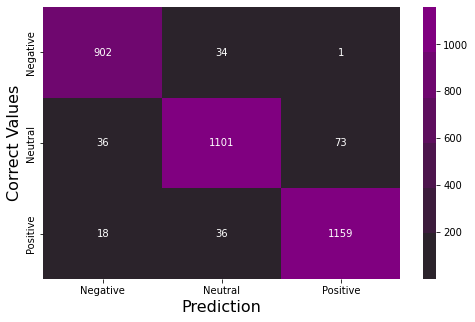

In [226]:
confusion_metrix_plot(x_train_pad, y_train, rnn_separate_encoder)


               precision    recall  f1-score   support

           0       0.70      0.83      0.76       336
           1       0.72      0.65      0.68       374
           2       0.80      0.74      0.77       411

    accuracy                           0.74      1121
   macro avg       0.74      0.74      0.74      1121
weighted avg       0.74      0.74      0.74      1121



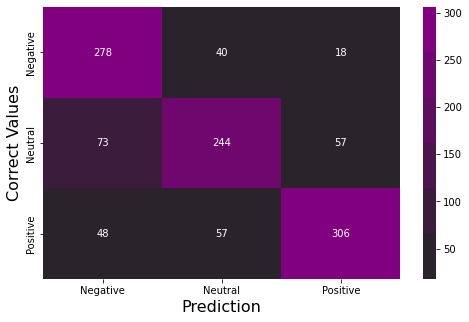

In [227]:
confusion_metrix_plot(x_val_pad, y_val, rnn_separate_encoder)

### RNN model 2

So from previous model we know that total data contains ~7300 tokens to lets train encoder on whole data and then we use x_train, x_val to encode them again

In [233]:
VOCAB_SIZE = 7300
SENTENCE_LENGTH = 100
EMBEDDING = 50
MODEL_NAME = 'rnn_model_encoder_large'
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [235]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [236]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [241]:
encoder_large.num_words

7300

In [242]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [247]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [244]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [246]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

#### Model

In [249]:
log_dir_fun

'neural_2_logs/29_01_2022/'

In [250]:
rnn_model_encoder_large = Sequential()
rnn_model_encoder_large.add(Embedding(input_dim = VOCAB_SIZE-1, output_dim= EMBEDDING,
    input_length= SENTENCE_LENGTH))
rnn_model_encoder_large.add(SimpleRNN(SENTENCE_LENGTH, dropout=0.4))
rnn_model_encoder_large.add(Dense(3, 'softmax'))

tensorboard_callback = TensorBoard(log_dir = log_dir_(MODEL_NAME), histogram_freq= 1)

rnn_model_encoder_large.compile(optimizer= tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['accuracy'])


In [251]:
rnn_model_encoder_large.fit(x_train_encoded_large_pad, y_train, epochs = 10,
    validation_data = [x_val_encoded_large_pad, y_val], callbacks=[tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 43s 374ms/step - loss: 1.1016 - accuracy: 0.3586 - val_loss: 1.1321 - val_accuracy: 0.3238
Epoch 2/10
105/105 [==============================] - 37s 354ms/step - loss: 1.1128 - accuracy: 0.3307 - val_loss: 1.1336 - val_accuracy: 0.2988
Epoch 3/10
105/105 [==============================] - 33s 316ms/step - loss: 1.1011 - accuracy: 0.3628 - val_loss: 1.0934 - val_accuracy: 0.3764
Epoch 4/10
105/105 [==============================] - 40s 383ms/step - loss: 1.1053 - accuracy: 0.3574 - val_loss: 1.0976 - val_accuracy: 0.3426
Epoch 5/10
105/105 [==============================] - 36s 346ms/step - loss: 1.1067 - accuracy: 0.3613 - val_loss: 1.1069 - val_accuracy: 0.3327
Epoch 6/10
105/105 [==============================] - 36s 341ms/step - loss: 1.1047 - accuracy: 0.3622 - val_loss: 1.1002 - val_accuracy: 0.3443
Epoch 7/10
105/105 [==============================] - 29s 277ms/step - loss: 1.1030 - accuracy: 0.3515 - val_loss: 1.1282 - val_ac

I think model is too much complex to learn lets copy and try without dropout

### RNN model 3

So from previous model we know that total data contains ~7300 tokens to lets train encoder on whole data and then we use x_train, x_val to encode them again

In [252]:
VOCAB_SIZE = 7300
SENTENCE_LENGTH = 100
EMBEDDING = 50
MODEL_NAME = 'rnn_model_encoder_large_2'
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [253]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [254]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [255]:
encoder_large.num_words

7300

In [256]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [257]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [258]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [259]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

#### Model

In [260]:
log_dir_fun

'neural_2_logs/29_01_2022/'

In [261]:
rnn_model_encoder_large_1 = Sequential()
rnn_model_encoder_large_1.add(Embedding(input_dim = VOCAB_SIZE-1, output_dim= EMBEDDING,
    input_length= SENTENCE_LENGTH))
rnn_model_encoder_large_1.add(SimpleRNN(SENTENCE_LENGTH))
rnn_model_encoder_large_1.add(Dense(3, 'softmax'))

tensorboard_callback = TensorBoard(log_dir = log_dir_(MODEL_NAME), histogram_freq= 1)

rnn_model_encoder_large_1.compile(optimizer= tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['accuracy'])


In [262]:
rnn_model_encoder_large_1.fit(x_train_encoded_large_pad, y_train, epochs = 5,
    validation_data = [x_val_encoded_large_pad, y_val], callbacks=[tensorboard_callback])

Epoch 1/5
105/105 [==============================] - 42s 371ms/step - loss: 1.1070 - accuracy: 0.3759 - val_loss: 1.0810 - val_accuracy: 0.3916
Epoch 2/5
105/105 [==============================] - 36s 342ms/step - loss: 1.0414 - accuracy: 0.4557 - val_loss: 0.9891 - val_accuracy: 0.5112
Epoch 3/5
105/105 [==============================] - 38s 361ms/step - loss: 1.0568 - accuracy: 0.4315 - val_loss: 1.0636 - val_accuracy: 0.4202
Epoch 4/5
105/105 [==============================] - 29s 278ms/step - loss: 0.9950 - accuracy: 0.4795 - val_loss: 0.9552 - val_accuracy: 0.5629
Epoch 5/5
105/105 [==============================] - 26s 243ms/step - loss: 0.8496 - accuracy: 0.6134 - val_loss: 0.8946 - val_accuracy: 0.5923


In [263]:
rnn_model_encoder_large_1.fit(x_train_encoded_large_pad, y_train, epochs = 5,
    validation_data = [x_val_encoded_large_pad, y_val], callbacks=[tensorboard_callback])

Epoch 1/5
105/105 [==============================] - 30s 285ms/step - loss: 0.8259 - accuracy: 0.6333 - val_loss: 0.9463 - val_accuracy: 0.5370
Epoch 2/5
105/105 [==============================] - 31s 296ms/step - loss: 0.7475 - accuracy: 0.6905 - val_loss: 0.9580 - val_accuracy: 0.5923
Epoch 3/5
105/105 [==============================] - 27s 256ms/step - loss: 0.6093 - accuracy: 0.7554 - val_loss: 0.9650 - val_accuracy: 0.6004
Epoch 4/5
105/105 [==============================] - 27s 255ms/step - loss: 0.5413 - accuracy: 0.7988 - val_loss: 0.9576 - val_accuracy: 0.6289
Epoch 5/5
105/105 [==============================] - 28s 267ms/step - loss: 0.4939 - accuracy: 0.8089 - val_loss: 0.9979 - val_accuracy: 0.6093


In [264]:
rnn_model_encoder_large_1.fit(x_train_encoded_large_pad, y_train, epochs = 10,
    validation_data = [x_val_encoded_large_pad, y_val])

Epoch 1/10
105/105 [==============================] - 34s 321ms/step - loss: 0.4969 - accuracy: 0.8074 - val_loss: 1.0768 - val_accuracy: 0.5798
Epoch 2/10
105/105 [==============================] - 34s 316ms/step - loss: 0.4244 - accuracy: 0.8452 - val_loss: 1.1965 - val_accuracy: 0.5905
Epoch 3/10
105/105 [==============================] - 27s 256ms/step - loss: 0.3665 - accuracy: 0.8685 - val_loss: 1.0414 - val_accuracy: 0.6432
Epoch 4/10
105/105 [==============================] - 30s 287ms/step - loss: 0.3553 - accuracy: 0.8735 - val_loss: 1.1186 - val_accuracy: 0.6209
Epoch 5/10
105/105 [==============================] - 27s 255ms/step - loss: 0.3694 - accuracy: 0.8622 - val_loss: 1.2085 - val_accuracy: 0.5968
Epoch 6/10
105/105 [==============================] - 30s 286ms/step - loss: 0.3176 - accuracy: 0.8940 - val_loss: 1.0847 - val_accuracy: 0.6521
Epoch 7/10
105/105 [==============================] - 27s 256ms/step - loss: 0.3337 - accuracy: 0.8839 - val_loss: 1.1636 - val_ac

let's reduce the model

### RNN model 4

So from previous model we know that total data contains ~7300 tokens to lets train encoder on whole data and then we use x_train, x_val to encode them again

In [274]:
VOCAB_SIZE = 7300
SENTENCE_LENGTH = 80
EMBEDDING = 35
MODEL_NAME = 'rnn_model_encoder_large_2'
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [275]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [276]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [277]:
encoder_large.num_words

7300

In [278]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [279]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [280]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [281]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

#### Model

In [273]:
log_dir_fun

'neural_2_logs/29_01_2022/'

In [284]:
rnn_model_encoder_large_2 = Sequential()
rnn_model_encoder_large_2.add(Embedding(input_dim = VOCAB_SIZE-1, output_dim= EMBEDDING,
    input_length= SENTENCE_LENGTH))
rnn_model_encoder_large_2.add(SimpleRNN(SENTENCE_LENGTH, recurrent_regularizer=tf.keras.regularizers.L2()))
rnn_model_encoder_large_2.add(Dense(3, 'softmax'))

tensorboard_callback = TensorBoard(log_dir = log_dir_(MODEL_NAME), histogram_freq= 1)

rnn_model_encoder_large_2.compile(optimizer= tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['accuracy'])

In [285]:
rnn_model_encoder_large_2.fit(x_train_encoded_large_pad, y_train, epochs = 5,
    validation_data = [x_val_encoded_large_pad, y_val], callbacks=[tensorboard_callback])

Epoch 1/5
105/105 [==============================] - 35s 295ms/step - loss: 1.7520 - accuracy: 0.4500 - val_loss: 1.8954 - val_accuracy: 0.2212
Epoch 2/5
105/105 [==============================] - 26s 247ms/step - loss: 1.4840 - accuracy: 0.5917 - val_loss: 1.3709 - val_accuracy: 0.6815
Epoch 3/5
105/105 [==============================] - 22s 209ms/step - loss: 1.2564 - accuracy: 0.6979 - val_loss: 1.3059 - val_accuracy: 0.6726
Epoch 4/5
105/105 [==============================] - 23s 223ms/step - loss: 1.1275 - accuracy: 0.7455 - val_loss: 1.2193 - val_accuracy: 0.7136
Epoch 5/5
105/105 [==============================] - 28s 268ms/step - loss: 0.9966 - accuracy: 0.8071 - val_loss: 1.2359 - val_accuracy: 0.6762


In [287]:
rnn_model_encoder_large_2.fit(x_train_encoded_large_pad, y_train, epochs = 5,
    validation_data = [x_val_encoded_large_pad, y_val])

Epoch 1/5
105/105 [==============================] - 21s 201ms/step - loss: 0.8211 - accuracy: 0.8750 - val_loss: 1.3230 - val_accuracy: 0.6566
Epoch 2/5
105/105 [==============================] - 26s 248ms/step - loss: 0.7570 - accuracy: 0.8854 - val_loss: 1.2463 - val_accuracy: 0.6762
Epoch 3/5
105/105 [==============================] - 27s 254ms/step - loss: 0.7388 - accuracy: 0.8875 - val_loss: 1.5090 - val_accuracy: 0.5781
Epoch 4/5
105/105 [==============================] - 32s 304ms/step - loss: 0.7114 - accuracy: 0.8848 - val_loss: 1.2301 - val_accuracy: 0.7288
Epoch 5/5
105/105 [==============================] - 26s 250ms/step - loss: 0.5790 - accuracy: 0.9339 - val_loss: 1.2293 - val_accuracy: 0.7404


In [288]:
rnn_model_encoder_large_2.fit(x_train_encoded_large_pad, y_train, epochs = 5,
    validation_data = [x_val_encoded_large_pad, y_val])

Epoch 1/10
105/105 [==============================] - 25s 237ms/step - loss: 0.5289 - accuracy: 0.9473 - val_loss: 1.2412 - val_accuracy: 0.7306
Epoch 2/10
105/105 [==============================] - 21s 203ms/step - loss: 0.4718 - accuracy: 0.9646 - val_loss: 1.3883 - val_accuracy: 0.7065
Epoch 3/10
105/105 [==============================] - 28s 264ms/step - loss: 0.4472 - accuracy: 0.9679 - val_loss: 1.4011 - val_accuracy: 0.7279
Epoch 4/10
105/105 [==============================] - 30s 284ms/step - loss: 0.6248 - accuracy: 0.8976 - val_loss: 1.2145 - val_accuracy: 0.7199
Epoch 5/10
105/105 [==============================] - 31s 293ms/step - loss: 0.4682 - accuracy: 0.9479 - val_loss: 1.3153 - val_accuracy: 0.7047
Epoch 6/10
105/105 [==============================] - 29s 276ms/step - loss: 0.4174 - accuracy: 0.9690 - val_loss: 1.3084 - val_accuracy: 0.7342
Epoch 7/10
105/105 [==============================] - 29s 275ms/step - loss: 0.3783 - accuracy: 0.9792 - val_loss: 1.3308 - val_ac

In [289]:
rnn_model_encoder_large_2.fit(x_train_encoded_large_pad, y_train, epochs = 5,
    validation_data = [x_val_encoded_large_pad, y_val])

Epoch 1/5
105/105 [==============================] - 28s 263ms/step - loss: 1.4021 - accuracy: 0.3699 - val_loss: 1.3978 - val_accuracy: 0.3479
Epoch 2/5
105/105 [==============================] - 30s 283ms/step - loss: 1.3900 - accuracy: 0.3676 - val_loss: 1.3920 - val_accuracy: 0.3452
Epoch 3/5
105/105 [==============================] - 41s 389ms/step - loss: 1.3807 - accuracy: 0.3795 - val_loss: 1.3823 - val_accuracy: 0.3426
Epoch 4/5
105/105 [==============================] - 31s 299ms/step - loss: 1.3733 - accuracy: 0.3729 - val_loss: 1.3853 - val_accuracy: 0.3443
Epoch 5/5
105/105 [==============================] - 39s 372ms/step - loss: 1.3596 - accuracy: 0.3604 - val_loss: 1.3662 - val_accuracy: 0.3479


### RNN model 5

So from previous model we know that total data contains ~7300 tokens to lets train encoder on whole data and then we use x_train, x_val to encode them again

In [290]:
VOCAB_SIZE = 7300
SENTENCE_LENGTH = 80
EMBEDDING = 35
MODEL_NAME = 'rnn_model_encoder_large_4'
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [291]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [292]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [293]:
encoder_large.num_words

7300

In [294]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [295]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [296]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

In [297]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           

#### Model

In [300]:
log_dir_fun

'neural_2_logs/29_01_2022/'

In [303]:
rnn_model_encoder_large_4 = Sequential()
rnn_model_encoder_large_4.add(Embedding(input_dim = VOCAB_SIZE-1, output_dim= EMBEDDING,
    input_length= SENTENCE_LENGTH))
rnn_model_encoder_large_4.add(SimpleRNN(SENTENCE_LENGTH, recurrent_regularizer=tf.keras.regularizers.L2(l2= 0.1)))
rnn_model_encoder_large_4.add(Dense(3, 'softmax'))

tensorboard_callback = TensorBoard(log_dir = log_dir_(MODEL_NAME), histogram_freq= 1)

rnn_model_encoder_large_4.compile(optimizer= tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['accuracy'])

In [304]:
rnn_model_encoder_large_4.fit(x_train_encoded_large_pad, y_train, epochs = 8,
    validation_data = [x_val_encoded_large_pad, y_val], callbacks=[tensorboard_callback])

Epoch 1/8
105/105 [==============================] - 44s 373ms/step - loss: 5.3180 - accuracy: 0.3720 - val_loss: 2.8993 - val_accuracy: 0.3595
Epoch 2/8
105/105 [==============================] - 36s 340ms/step - loss: 2.0402 - accuracy: 0.3744 - val_loss: 1.5122 - val_accuracy: 0.3640
Epoch 3/8
105/105 [==============================] - 33s 319ms/step - loss: 1.3077 - accuracy: 0.3833 - val_loss: 1.1940 - val_accuracy: 0.3595
Epoch 4/8
105/105 [==============================] - 30s 287ms/step - loss: 1.1308 - accuracy: 0.3896 - val_loss: 1.1099 - val_accuracy: 0.3613
Epoch 5/8
105/105 [==============================] - 32s 308ms/step - loss: 1.0831 - accuracy: 0.3783 - val_loss: 1.0900 - val_accuracy: 0.3693
Epoch 6/8
105/105 [==============================] - 31s 290ms/step - loss: 1.0712 - accuracy: 0.3824 - val_loss: 1.0845 - val_accuracy: 0.3622
Epoch 7/8
105/105 [==============================] - 36s 338ms/step - loss: 1.0647 - accuracy: 0.3786 - val_loss: 1.0894 - val_accuracy:

I think model is getting do complex and with regularization it is unable to learn

### RNN model 6 (simple)

In [305]:
VOCAB_SIZE = 7300
SENTENCE_LENGTH = 70
EMBEDDING = 30
MODEL_NAME = 'rnn_model_encoder_large_6'
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [306]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [307]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [308]:
encoder_large.num_words

7300

In [309]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [310]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [311]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  97,  551,    3,  551,    8,  551, 71

In [312]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  55,    1,    3,    7,   64,   13,  1

#### Model

In [313]:
log_dir_fun, MODEL_NAME

('neural_2_logs/29_01_2022/', 'rnn_model_encoder_large_6')

In [314]:
rnn_model_encoder_large_6 = Sequential()
rnn_model_encoder_large_6.add(Embedding(input_dim = VOCAB_SIZE-1, output_dim= EMBEDDING,
    input_length= SENTENCE_LENGTH))
rnn_model_encoder_large_6.add(SimpleRNN(SENTENCE_LENGTH, recurrent_regularizer=tf.keras.regularizers.L2()))
rnn_model_encoder_large_6.add(Dense(3, 'softmax'))

tensorboard_callback = TensorBoard(log_dir = log_dir_(MODEL_NAME), histogram_freq= 1)

rnn_model_encoder_large_6.compile(optimizer= tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['accuracy'])

In [315]:
rnn_model_encoder_large_6.fit(x_train_encoded_large_pad, y_train, epochs = 10,
    validation_data = [x_val_encoded_large_pad, y_val], callbacks=[tensorboard_callback])

Epoch 1/10
105/105 [==============================] - 41s 351ms/step - loss: 1.6963 - accuracy: 0.4375 - val_loss: 1.6637 - val_accuracy: 0.3104
Epoch 2/10
105/105 [==============================] - 32s 302ms/step - loss: 1.4781 - accuracy: 0.5539 - val_loss: 1.4146 - val_accuracy: 0.6182
Epoch 3/10
105/105 [==============================] - 28s 270ms/step - loss: 1.2091 - accuracy: 0.7119 - val_loss: 1.3001 - val_accuracy: 0.6628
Epoch 4/10
105/105 [==============================] - 26s 245ms/step - loss: 1.0822 - accuracy: 0.7613 - val_loss: 1.4425 - val_accuracy: 0.5736
Epoch 5/10
105/105 [==============================] - 26s 252ms/step - loss: 0.9429 - accuracy: 0.8199 - val_loss: 1.2933 - val_accuracy: 0.6664
Epoch 6/10
105/105 [==============================] - 28s 265ms/step - loss: 0.8566 - accuracy: 0.8470 - val_loss: 1.3450 - val_accuracy: 0.6289
Epoch 7/10
105/105 [==============================] - 34s 321ms/step - loss: 0.7499 - accuracy: 0.8732 - val_loss: 1.2255 - val_ac

In [316]:
rnn_model_encoder_large_6.fit(x_train_encoded_large_pad, y_train, epochs = 3,
    validation_data = [x_val_encoded_large_pad, y_val])

Epoch 1/3
105/105 [==============================] - 29s 276ms/step - loss: 0.6834 - accuracy: 0.8747 - val_loss: 1.4420 - val_accuracy: 0.6485
Epoch 2/3
105/105 [==============================] - 27s 252ms/step - loss: 0.5536 - accuracy: 0.9223 - val_loss: 1.3665 - val_accuracy: 0.6842
Epoch 3/3
105/105 [==============================] - 34s 322ms/step - loss: 0.4762 - accuracy: 0.9452 - val_loss: 1.3766 - val_accuracy: 0.7047


In [317]:
PATH

'Model_files/29_01_22/'

In [318]:
save_model_dir(rnn_model_encoder_large_6, MODEL_NAME, PATH = PATH)

INFO:tensorflow:Assets written to: Model_files/29_01_22/rnn_model_encoder_large_6_29_01_22-15_09_21.tf\assets
Model is saved with name Model_files/29_01_22/rnn_model_encoder_large_6_29_01_22-15_09_21.tf


In [319]:
loaded_rnn_model_6 = load_model('Model_files/29_01_22/rnn_model_encoder_large_6_29_01_22-15_09_21.tf')

In [320]:
loaded_rnn_model_6.evaluate(x_train_encoded_large_pad, y_train)

105/105 [==============================] - 5s 45ms/step - loss: 0.4508 - accuracy: 0.9551


[0.4508022964000702, 0.9550595283508301]

In [321]:
loaded_rnn_model_6.evaluate(x_val_encoded_large_pad, y_val)

36/36 [==============================] - 2s 39ms/step - loss: 1.3766 - accuracy: 0.7047


[1.3766485452651978, 0.7047279477119446]


               precision    recall  f1-score   support

           0       0.75      0.69      0.72       336
           1       0.66      0.61      0.63       374
           2       0.71      0.80      0.75       411

    accuracy                           0.70      1121
   macro avg       0.71      0.70      0.70      1121
weighted avg       0.70      0.70      0.70      1121



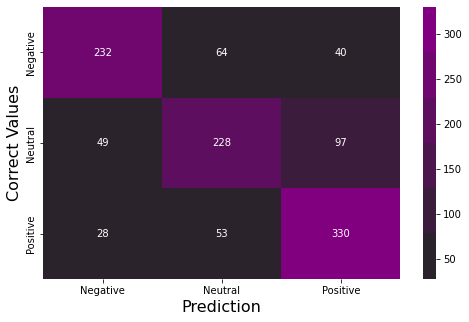

In [324]:
confusion_metrix_plot(x_val_encoded_large_pad, y_val, loaded_rnn_model_6)

In [326]:
encoded_reviews_list = encoder_large.texts_to_sequences(review_list)
encoded_reviews_list_pad = pad_sequences(encoded_reviews_list, maxlen=SENTENCE_LENGTH, padding = 'post')
encoded_reviews_list_pad

array([[   2,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [2732,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 591,    1,    0,    0,    0,    0,   

In [327]:
review_list

['Good phone',
 'best phone',
 'worst phone',
 'i love this phone',
 'bad phone',
 'good phone with good camera',
 'Best Oneplus phone having very clear camera and battery backup is very good']

In [328]:
get_prediction(encoded_reviews_list_pad, loaded_rnn_model_6)

array([1, 1, 2, 1, 0, 2, 1], dtype=int64)

### So we tried alots of RNN model but we can see that if the model is complex it is not able to learn,  So we are going forward to try LSTM model

## LSTM models

### LSTM model 1

In [341]:
EMBEDDING = 50
SENTENCE_LENGTH = 100
VOCAB_SIZE = 7600
MODEL_NAME = 'lstm_model_1'
EPOCH = 20
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [331]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [332]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [333]:
encoder_large.num_words

7600

In [334]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [335]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [336]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [337]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

#### Model

In [342]:
lstm_model_1 = Sequential([
    Embedding(VOCAB_SIZE-1, EMBEDDING, input_length= SENTENCE_LENGTH),
    LSTM(SENTENCE_LENGTH),
    Dense(3, activation = 'softmax')
])

tensorboard_callback = TensorBoard(log_dir= log_dir_(MODEL_NAME), histogram_freq=1)

lstm_model_1.compile(optimizer = tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

In [343]:
lstm_model_1.fit(x_train_encoded_large_pad, y_train, epochs = EPOCH, 
validation_data = [x_val_encoded_large_pad, y_val], callbacks = [tensorboard_callback])

Epoch 1/20
105/105 [==============================] - 10s 54ms/step - loss: 1.0928 - accuracy: 0.3649 - val_loss: 1.0952 - val_accuracy: 0.3568
Epoch 2/20
105/105 [==============================] - 5s 43ms/step - loss: 1.0857 - accuracy: 0.3818 - val_loss: 1.0942 - val_accuracy: 0.3568
Epoch 3/20
105/105 [==============================] - 5s 44ms/step - loss: 1.0832 - accuracy: 0.3845 - val_loss: 1.0967 - val_accuracy: 0.3559
Epoch 4/20
105/105 [==============================] - 4s 40ms/step - loss: 1.0789 - accuracy: 0.3908 - val_loss: 1.0843 - val_accuracy: 0.3568
Epoch 5/20
105/105 [==============================] - 3s 32ms/step - loss: 1.0758 - accuracy: 0.3878 - val_loss: 1.0760 - val_accuracy: 0.3613
Epoch 6/20
105/105 [==============================] - 4s 38ms/step - loss: 1.0685 - accuracy: 0.3860 - val_loss: 1.0755 - val_accuracy: 0.3622
Epoch 7/20
105/105 [==============================] - 3s 31ms/step - loss: 1.0630 - accuracy: 0.3949 - val_loss: 1.0791 - val_accuracy: 0.372

Some thing good is happening lets create other same model and train it for longer time

### LSTM model 2

In [344]:
EMBEDDING = 50
SENTENCE_LENGTH = 100
VOCAB_SIZE = 7600
MODEL_NAME = 'lstm_model_2'
EPOCH = 40
print(log_dir_fun)
print(PATH)

neural_2_logs/29_01_2022/
Model_files/29_01_22/


#### Tokenizer

In [345]:
reviews.head()

,lemmatized,Sentiment
0,review give 24 hrs l find amazing 10 day usage...,1
1,like tell win t give technical review like ytu...,2
2,receive unit 4 hr ago think 1 feel sturdy prem...,2
3,get oneplus nord 2 5 g phone deliver yesterday...,1
4,7 28 receive yesterday impression look feel gr...,0


In [346]:
encoder_large = Tokenizer(num_words=VOCAB_SIZE)
encoder_large.fit_on_texts(reviews['lemmatized'])

In [347]:
encoder_large.num_words

7600

In [348]:
file = open('separete_tokenizer/encoder_large.pkl', 'wb')
pickle.dump(encoder_large, file)

In [349]:
x_train[:4]

3071    awesome product good phone budget thank amazon...
4442       camera upto mark finger print reader work good
4414    game beast camera beast charge beast beastsimp...
5097     phone explode m afraid close plan buy pls choose
Name: lemmatized, dtype: object

In [350]:
x_train_encoded_large = encoder_large.texts_to_sequences(x_train)
x_train_encoded_large_pad = pad_sequences(x_train_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_train_encoded_large_pad[:8]

array([[  55,   29,    2,    1,  194,  219,   53, 6703,  730,  219,  373,
          29,   15,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,  202,  158,  144,  164,  209,   25,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [351]:
x_val_encoded_large= encoder_large.texts_to_sequences(x_val)
x_val_encoded_large_pad = pad_sequences(x_val_encoded_large, maxlen= SENTENCE_LENGTH, padding = 'post')
x_val_encoded_large_pad[:8]

array([[  47,   84,   27,  232,  265,    4,   38,   13,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  88,    1,  109,  357,   48,    1,    1,   77,  336,  244, 1196,
          77,  280,   50,  226,   23,  584, 1522,   42,   39,    1,   77,
         535,  584,   43,  101,    1,   36,   72,    2,   25,   18,  388,
          18,    1,   20,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

#### Model

In [352]:
lstm_model_2 = Sequential([
    Embedding(VOCAB_SIZE-1, EMBEDDING, input_length= SENTENCE_LENGTH),
    LSTM(SENTENCE_LENGTH),
    Dense(3, activation = 'softmax')
])

tensorboard_callback = TensorBoard(log_dir= log_dir_(MODEL_NAME), histogram_freq=1)

lstm_model_2.compile(optimizer = tf.keras.optimizers.Adam(),
loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

In [353]:
lstm_model_2.fit(x_train_encoded_large_pad, y_train, epochs = EPOCH, 
validation_data = [x_val_encoded_large_pad, y_val], callbacks = [tensorboard_callback])

Epoch 1/40
105/105 [==============================] - 13s 81ms/step - loss: 1.0930 - accuracy: 0.3676 - val_loss: 1.0964 - val_accuracy: 0.3559
Epoch 2/40
105/105 [==============================] - 5s 46ms/step - loss: 1.0737 - accuracy: 0.4155 - val_loss: 1.0952 - val_accuracy: 0.3381
Epoch 3/40
105/105 [==============================] - 5s 48ms/step - loss: 1.0927 - accuracy: 0.3866 - val_loss: 1.0973 - val_accuracy: 0.3559
Epoch 4/40
105/105 [==============================] - 6s 57ms/step - loss: 1.0798 - accuracy: 0.3881 - val_loss: 1.0908 - val_accuracy: 0.3568
Epoch 5/40
105/105 [==============================] - 8s 79ms/step - loss: 1.0845 - accuracy: 0.3851 - val_loss: 1.0875 - val_accuracy: 0.3568
Epoch 6/40
105/105 [==============================] - 5s 44ms/step - loss: 1.0693 - accuracy: 0.4024 - val_loss: 1.0381 - val_accuracy: 0.5129
Epoch 7/40
105/105 [==============================] - 5s 47ms/step - loss: 1.0700 - accuracy: 0.4199 - val_loss: 1.0952 - val_accuracy: 0.356

In [354]:
lstm_model_2.evaluate(x_val_encoded_large_pad, y_val)

36/36 [==============================] - 2s 40ms/step - loss: 0.9938 - accuracy: 0.8475 1s - loss: 0.9048 - accura


[0.9938427805900574, 0.8474576473236084]

In [355]:
save_model_dir(lstm_model_2, MODEL_NAME, PATH=PATH)

INFO:tensorflow:Assets written to: Model_files/29_01_22/lstm_model_2_29_01_22-16_06_51.tf\assets


INFO:tensorflow:Assets written to: Model_files/29_01_22/lstm_model_2_29_01_22-16_06_51.tf\assets


Model is saved with name Model_files/29_01_22/lstm_model_2_29_01_22-16_06_51.tf


In [365]:
lstm_model_2_loaded = load_model('Model_files/29_01_22/lstm_model_2_29_01_22-16_06_51.tf')

In [366]:
lstm_model_2_loaded.evaluate(x_val_encoded_large_pad, y_val )

36/36 [==============================] - 2s 17ms/step - loss: 0.9938 - accuracy: 0.8475


[0.9938427805900574, 0.8474576473236084]


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       937
           1       1.00      1.00      1.00      1210
           2       1.00      1.00      1.00      1213

    accuracy                           1.00      3360
   macro avg       1.00      1.00      1.00      3360
weighted avg       1.00      1.00      1.00      3360



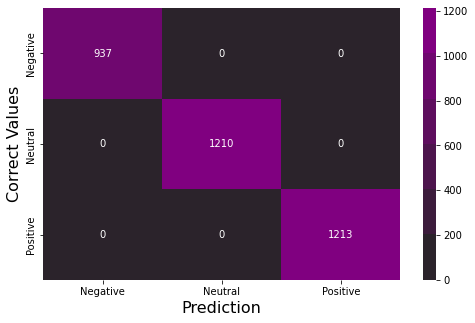

In [367]:
confusion_metrix_plot(x_train_encoded_large_pad, y_train, lstm_model_2_loaded )


               precision    recall  f1-score   support

           0       0.87      0.88      0.87       336
           1       0.79      0.75      0.77       374
           2       0.88      0.91      0.89       411

    accuracy                           0.85      1121
   macro avg       0.85      0.85      0.85      1121
weighted avg       0.85      0.85      0.85      1121



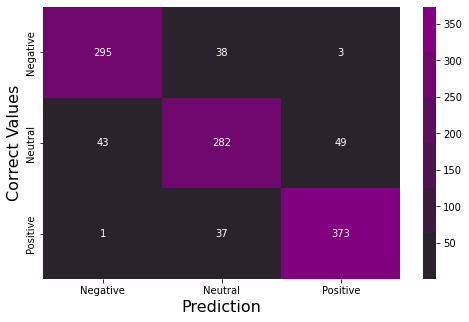

In [368]:
confusion_metrix_plot(x_val_encoded_large_pad, y_val, lstm_model_2_loaded)

In [377]:
review_list
review_list.append("Worst UI experience from samsung.1. Basic app lock setting missing.2. Data disconnected while in a call.3. While using Amazon custome care chat keyboard hide the typed content.4. SMS selects the recent caller option missing.5. You can't off the alarm for one particular day. You have to off then on the alarm again.5. Unnecessary samsung apps occupy the space which you not even open in your lifetime.")

In [378]:
encoded_review_list = encoder_large.texts_to_sequences(review_list)
encoded_review_list

[[2, 1],
 [2732, 1],
 [591, 1],
 [141, 1],
 [17, 1],
 [2, 1, 2, 3],
 [2732, 10, 1, 1240, 253, 3, 4, 71, 2],
 [591,
  123,
  45,
  199,
  21,
  452,
  27,
  372,
  271,
  3172,
  5,
  1207,
  2322,
  112,
  22,
  4606,
  53,
  291,
  920,
  1126,
  1381,
  1006,
  30,
  1752,
  758,
  734,
  140,
  3172,
  12,
  865,
  736,
  1100,
  1120,
  15,
  865,
  235,
  654,
  736,
  12,
  1058,
  199,
  631,
  865,
  105,
  212,
  5812]]

In [381]:
encoded_review_list_pad = pad_sequences(encoded_review_list, maxlen = SENTENCE_LENGTH, padding = 'post')
encoded_review_list_pad[5:]

array([[   2,    1,    2,    3,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [2732,   10,    1, 1240,  253,    3,    4,   71,    2,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [382]:
get_prediction(encoded_review_list_pad, lstm_model_2_loaded)

array([1, 1, 0, 1, 0, 2, 2, 0], dtype=int64)

In [383]:
review_list

['Good phone',
 'best phone',
 'worst phone',
 'i love this phone',
 'bad phone',
 'good phone with good camera',
 'Best Oneplus phone having very clear camera and battery backup is very good',
 "Worst UI experience from samsung.1. Basic app lock setting missing.2. Data disconnected while in a call.3. While using Amazon custome care chat keyboard hide the typed content.4. SMS selects the recent caller option missing.5. You can't off the alarm for one particular day. You have to off then on the alarm again.5. Unnecessary samsung apps occupy the space which you not even open in your lifetime."]

In [386]:
len(review_list[-1].split())

66

In [391]:
(encoded_review_list_pad[-1] == 0).sum()

54